#OBJETIVO

O desafio é analisar esses dados e identificar
oportunidades para otimizar nossas operações logísticas, visando a melhoria da satisfação do cliente e a redução de custos.

# ONDE EU PODERIA ATACAR NA PARTE DE REDUZIR OS CUSTO

REDUZIR CUSTO:

*   1 - Atuar se baseando nas estatísticas
*   2 - Identificar custos desnecessários




# TRATATIVA DOS DADOS

In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Realizando a leitura da base de dados
base_dados = pd.read_csv('/content/drive/MyDrive/Analista de dados/business_case_logistica_2024-06-30T10_39_33.167495-03_00.csv', low_memory=False)
base_dados['Prazo para Sair do CD'] = pd.to_datetime(base_dados['Prazo para Sair do CD'])
base_dados['Enviado em:'] = pd.to_datetime(base_dados['Enviado em:'])
base_dados['Entregue para o cliente em:'] = pd.to_datetime(base_dados['Entregue para o cliente em:'])
base_dados['Prazo a transportadora entregar no cliente'] = pd.to_datetime(base_dados['Prazo a transportadora entregar no cliente'])
base_dados['created_at'] = pd.to_datetime(base_dados['created_at'])

In [3]:
# Verificando cada tipo de coluna
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348226 entries, 0 to 348225
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   id                                          348226 non-null  int64         
 1   reference                                   348226 non-null  object        
 2   batch_id                                    345867 non-null  float64       
 3   created_at                                  348226 non-null  datetime64[ns]
 4   Código de Rastreio                          348220 non-null  object        
 5   Valor de NF (R$)                            348226 non-null  float64       
 6   currency                                    348226 non-null  object        
 7   order_state                                 348226 non-null  object        
 8   Cidade                                      348226 non-null  object       

In [4]:
# Verificando a existencia de dados vazios
base_dados.isnull().sum()

id                                                0
reference                                         0
batch_id                                       2359
created_at                                        0
Código de Rastreio                                6
Valor de NF (R$)                                  0
currency                                          0
order_state                                       0
Cidade                                            0
Estado                                            0
CEP                                               0
Frete Cobrado do Cliente (R$)                     0
Frete cobrado pela transportadora (R$)            0
Transportadora                                    0
postage_list_id                                1332
Número da NF                                   1208
Status do Pedido                                  0
Prazo para Sair do CD                             0
Enviado em:                                    1332
Entregue par

In [5]:
# Remover as colunas que não serão uteis para essa análise exploratoria.
remover_colunas = ['reference','batch_id','Código de Rastreio','currency','order_state','postage_list_id','Número da NF','order_type','created_at', 'Prazo a transportadora entregar no cliente','Entregue para o cliente em:','Enviado em:', 'Prazo para Sair do CD']
base_dados.drop(remover_colunas, axis=1, inplace=True)

# Removendo valores negativos da análise
base_dados = base_dados[base_dados['Valor de NF (R$)'] >= 0]

# Realizando a somatórias do custo frete total
base_dados['Frete Total'] = base_dados['Frete Cobrado do Cliente (R$)'] + base_dados['Frete cobrado pela transportadora (R$)']

# Adicionando uma nova coluna para indicar se o frete é grátis ou pago
base_dados['frete_status'] = base_dados['Frete Cobrado do Cliente (R$)'].apply(lambda x: 'Frete Grátis' if x == 0 else 'Frete Pago')

# Removendo um - no cep
base_dados['CEP'] = base_dados['CEP'].str.replace('-','')
base_dados['CEP'] = base_dados['CEP'].str.replace(' Zona nova','')
base_dados['CEP'] = base_dados['CEP'].astype(int)



<ipython-input-5-f2d4a4edae13>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_dados['Frete Total'] = base_dados['Frete Cobrado do Cliente (R$)'] + base_dados['Frete cobrado pela transportadora (R$)']


In [6]:
# Verificando valores fazios
base_dados.isnull().sum()

id                                         0
Valor de NF (R$)                           0
Cidade                                     0
Estado                                     0
CEP                                        0
Frete Cobrado do Cliente (R$)              0
Frete cobrado pela transportadora (R$)     0
Transportadora                             0
Status do Pedido                           0
Número de Itens no Pedido                  0
Peso (kg)                                 64
Frete Total                                0
frete_status                               0
dtype: int64

In [7]:
# Descrição da base
base_dados.describe()

id  Valor de NF (R$)           CEP  \
count  3.482060e+05     348206.000000  3.482060e+05   
mean   3.031329e+06        182.683941  3.706936e+07   
std    1.379622e+05        120.152655  3.035824e+07   
min    2.787897e+06          0.000000  1.001000e+06   
25%    2.910338e+06        112.610000  9.820240e+06   
50%    3.034274e+06        159.800000  2.596120e+07   
75%    3.150592e+06        206.800000  6.507006e+07   
max    3.269036e+06       4894.370000  9.999000e+07   

       Frete Cobrado do Cliente (R$)  Frete cobrado pela transportadora (R$)  \
count                  348206.000000                           348206.000000   
mean                        5.786920                               14.411748   
std                         7.572034                                5.976811   
min                         0.000000                                5.410000   
25%                         0.000000                               11.700000   
50%                         0.000000                               13.610000   
75%                        12.900000                               16.020000   
max                       109.900000                              153.840000   

       Número de Itens no Pedido      Peso (kg)    Frete Total  
count              348206.000000  348142.000000  348206.000000  
mean                    3.168268       0.260868      20.198668  
std                     2.274008       0.344001       9.737959  
min                     0.000000       0.000000       5.410000  
25%                     1.000000       0.040000      13.450000  
50%                     3.000000       0.100000      17.620000  
75%                     4.000000       0.381000      25.500000  
max                    76.000000      14.950000     219.520000

In [8]:
# Identificando o estado que possui custo mais elevado
print("**"*20)
print(base_dados.groupby('Estado')['Frete Total'].sum().sort_values(ascending=False))
print("**"*20)


base_porcentagem = []
base_estado = []

for i in base_dados['Estado'].unique():
  porcentagem = (base_dados[base_dados['Estado']==i]['Frete Total'].sum())/(base_dados['Frete Total'].sum())
  base_porcentagem.append(porcentagem*100)
  base_estado.append(i)


# Importando a tabela de % cada estado
estado_porcentagem_custo = pd.DataFrame({'Estado':base_estado, 'Porcentagem':base_porcentagem})
estado_porcentagem_custo.sort_values(by='Porcentagem', ascending=False)


****************************************
Estado
São Paulo              2376563.32
Rio de Janeiro          773814.89
Minas Gerais            545710.01
Ceará                   364416.35
Rio Grande do Sul       331940.77
Paraná                  304082.89
Santa Catarina          278154.44
Bahia                   258000.62
Pernambuco              196003.31
Distrito Federal        187965.56
Pará                    187811.52
Goiás                   186690.56
Espírito Santo          129502.64
Mato Grosso             119814.53
Maranhão                110348.34
Amazonas                103151.88
Rio Grande do Norte      93116.28
Mato Grosso do Sul       86233.42
Paraíba                  85486.35
Piauí                    73171.96
Alagoas                  63003.62
Sergipe                  49709.72
Rondônia                 38230.61
Tocantins                29825.87
Acre                     26876.23
Amapá                    18754.10
Roraima                  14917.54
Name: Frete Total, dtype: float64


Estado  Porcentagem
1             São Paulo    33.790173
5        Rio de Janeiro    11.002164
2          Minas Gerais     7.758950
8                 Ceará     5.181302
11    Rio Grande do Sul     4.719561
0                Paraná     4.323476
9        Santa Catarina     3.954823
4                 Bahia     3.668274
10           Pernambuco     2.786791
21     Distrito Federal     2.672510
19                 Pará     2.670320
12                Goiás     2.654382
7        Espírito Santo     1.841279
22          Mato Grosso     1.703533
15             Maranhão     1.568942
23             Amazonas     1.466622
14  Rio Grande do Norte     1.323935
6    Mato Grosso do Sul     1.226074
16              Paraíba     1.215452
3                 Piauí     1.040365
17              Alagoas     0.895791
13              Sergipe     0.706777
20             Rondônia     0.543566
25            Tocantins     0.424067
24                 Acre     0.382128
18                Amapá     0.266647
26              Roraima     0.212099

# ANÁLISE DO CUSTO EM SÃO PAULO


In [9]:
# Identificando o custo da maior transportadora no estado de São Paulo
Estado_SP = base_dados[base_dados['Estado']=='São Paulo']
Estado_SP.groupby('Transportadora')['Frete Total'].sum().sort_values(ascending=False)

Transportadora
infracommerce_carriers         989952.67
loggi                          607228.56
infracommerce_total_express    520312.65
infracommerce_jt_express       256053.91
sedex_agencia                    2571.44
total_express                     300.62
infracommerce_dialogo             126.81
infracommerce_gfl                  16.66
Name: Frete Total, dtype: float64

In [10]:
# verificando a média de preço do frete cada Transportadora
Estado_SP.groupby('Transportadora')['Frete Total'].mean().sort_values(ascending=False)

Transportadora
infracommerce_dialogo          25.362000
sedex_agencia                  20.408254
total_express                  20.041333
infracommerce_jt_express       19.969888
infracommerce_total_express    19.755207
infracommerce_carriers         17.124542
loggi                          13.309119
infracommerce_gfl               8.330000
Name: Frete Total, dtype: float64

In [11]:
# Contando valores unicos por transportadora
Estado_SP['Transportadora'].value_counts()

Transportadora
infracommerce_carriers         57809
loggi                          45625
infracommerce_total_express    26338
infracommerce_jt_express       12822
sedex_agencia                    126
total_express                     15
infracommerce_dialogo              5
infracommerce_gfl                  2
Name: count, dtype: int64

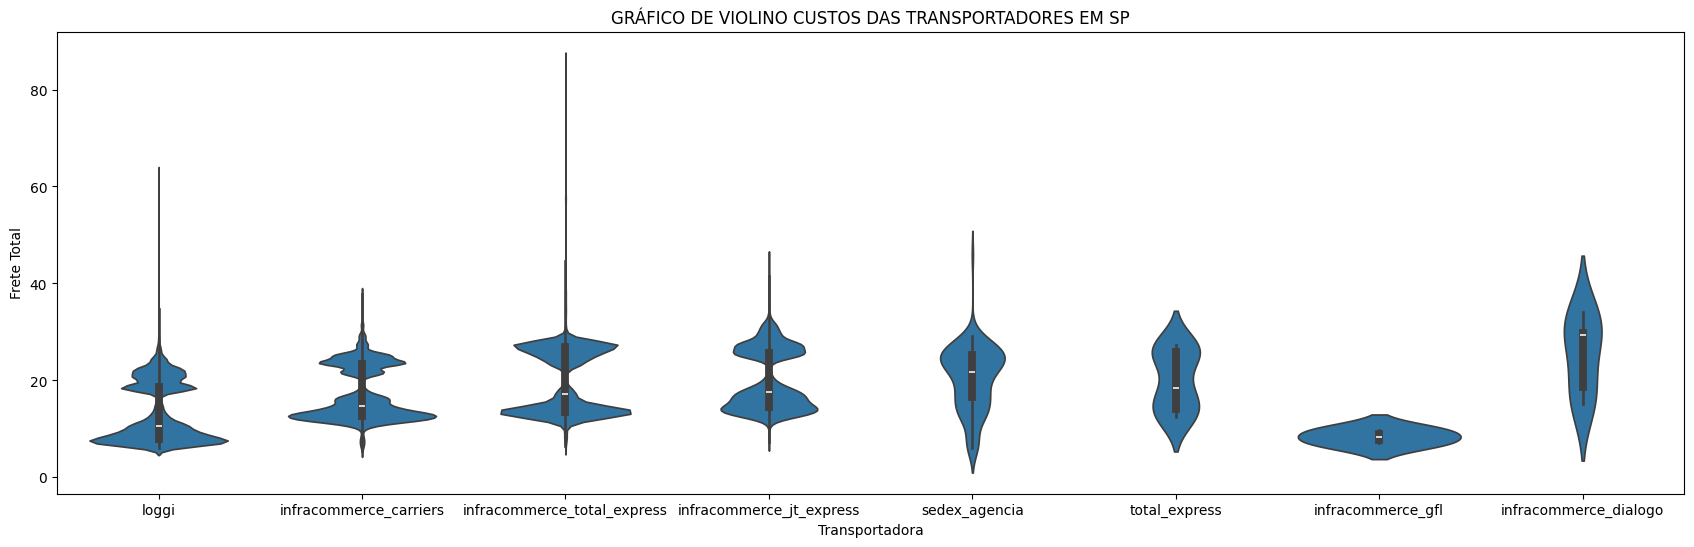

In [12]:
# Gráfico de violino do custo em SP
plt.figure(figsize=(21,6))
plt.title('GRÁFICO DE VIOLINO CUSTOS DAS TRANSPORTADORES EM SP')
sns.violinplot(data=Estado_SP, x='Transportadora', y='Frete Total')
plt.show()

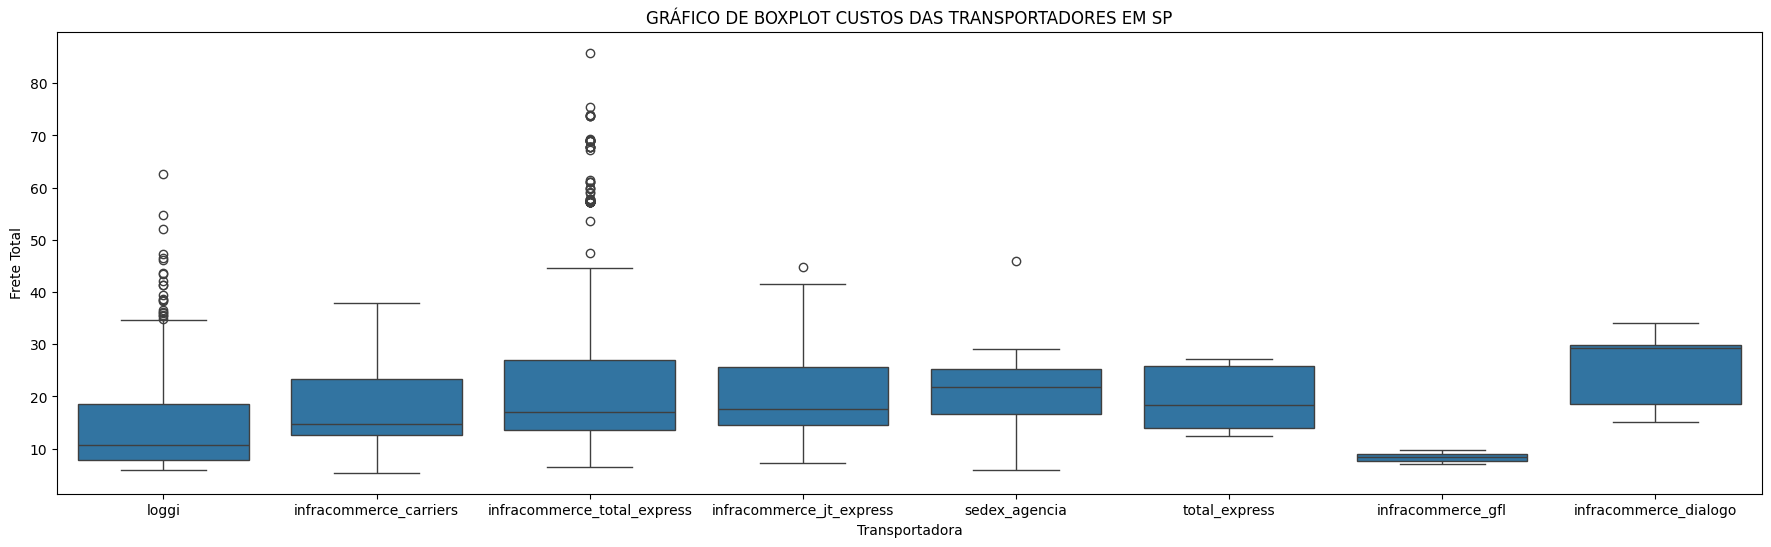

In [13]:
# Gráfico de boxplot do custo em SP
plt.figure(figsize=(22,6))
plt.title('GRÁFICO DE BOXPLOT CUSTOS DAS TRANSPORTADORES EM SP')
sns.boxplot(data=Estado_SP, x='Transportadora', y='Frete Total')
plt.show()

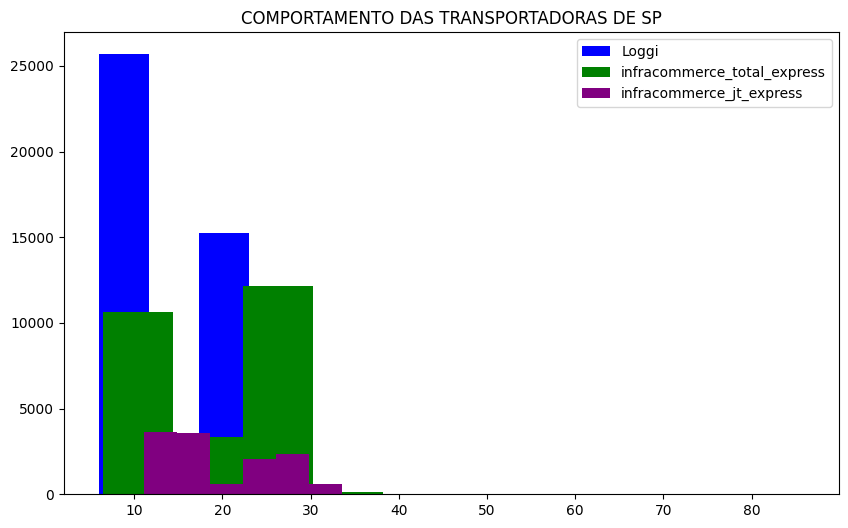

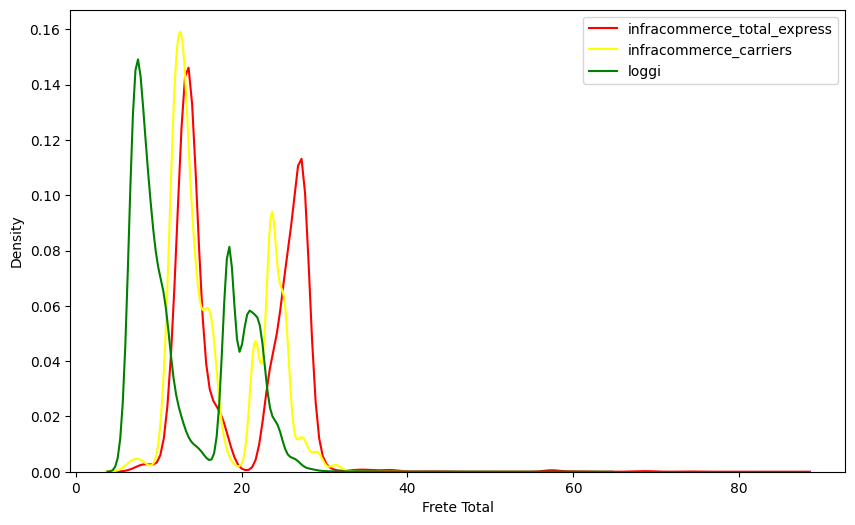

In [14]:
# HISTOHRAMA CUSTO EM SÃO PAULO
infracommerce_carriers = Estado_SP[Estado_SP['Transportadora']=='infracommerce_carriers']
infracommerce_total_express = Estado_SP[Estado_SP['Transportadora']=='infracommerce_total_express']
infracommerce_jt_express = Estado_SP[Estado_SP['Transportadora']=='infracommerce_jt_express']
loggi = Estado_SP[Estado_SP['Transportadora']=='loggi']

plt.figure(figsize=(10,6))
plt.title('COMPORTAMENTO DAS TRANSPORTADORAS DE SP')
plt.hist(loggi['Frete Total'],bins=10,color='blue', label='Loggi')
plt.hist(infracommerce_total_express['Frete Total'],bins=10,color='green', label='infracommerce_total_express')
plt.hist(infracommerce_jt_express['Frete Total'],bins=10,color='purple', label='infracommerce_jt_express')
plt.legend(loc='upper right')

# Gráfico de densidade
plt.figure(figsize=(10,6))
sns.kdeplot(data=infracommerce_total_express['Frete Total'] , color='red', label='infracommerce_total_express')
sns.kdeplot(data=infracommerce_carriers['Frete Total'], color='yellow', label='infracommerce_carriers')
sns.kdeplot(data=loggi['Frete Total'], color='green', label='loggi')
plt.legend(loc='upper right')
plt.show()

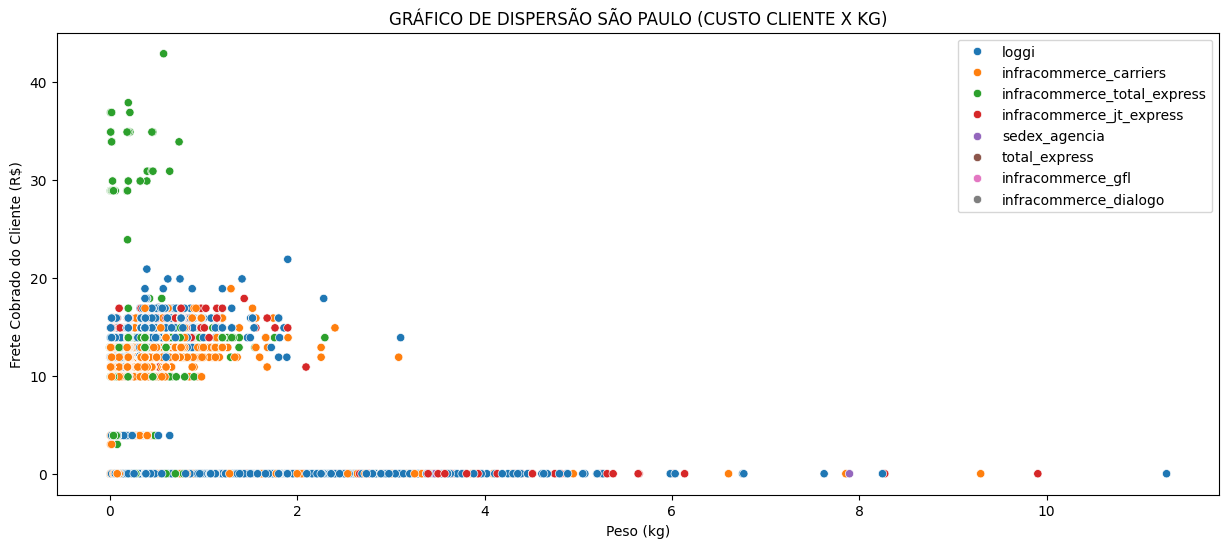

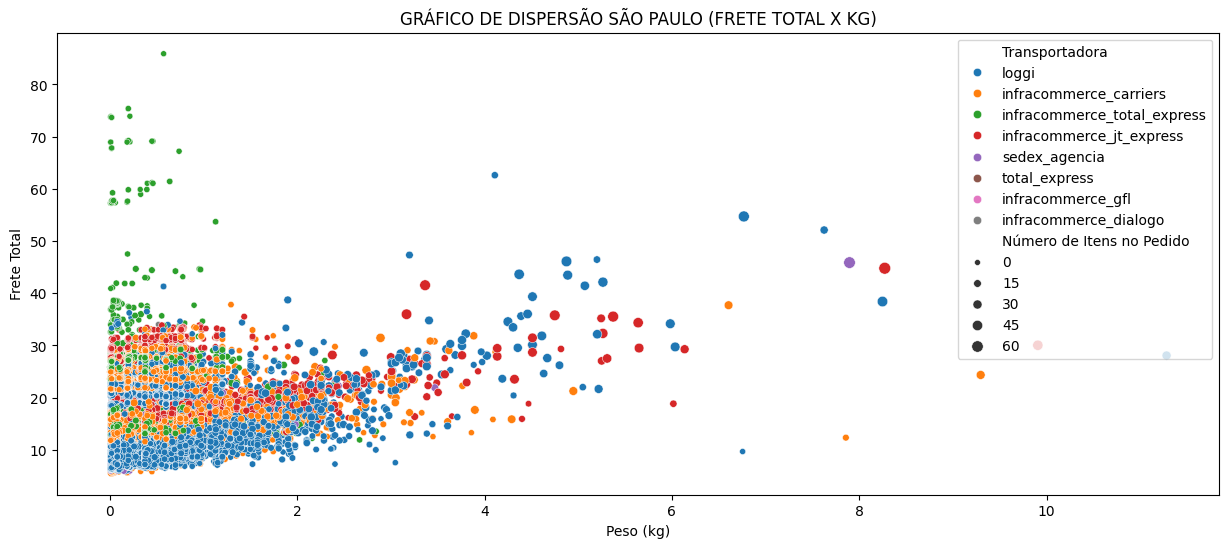

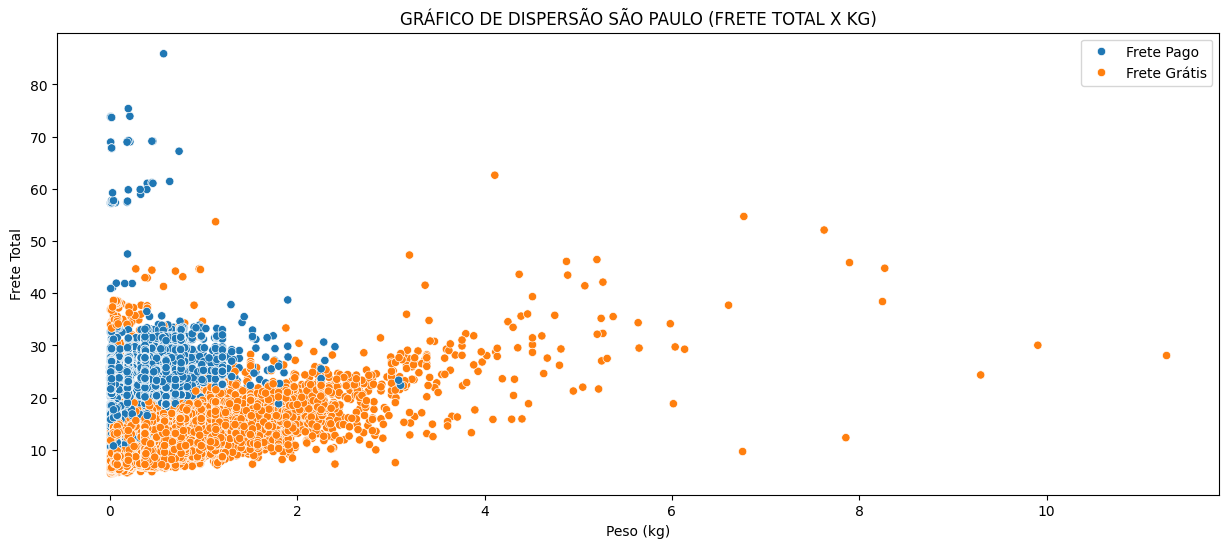

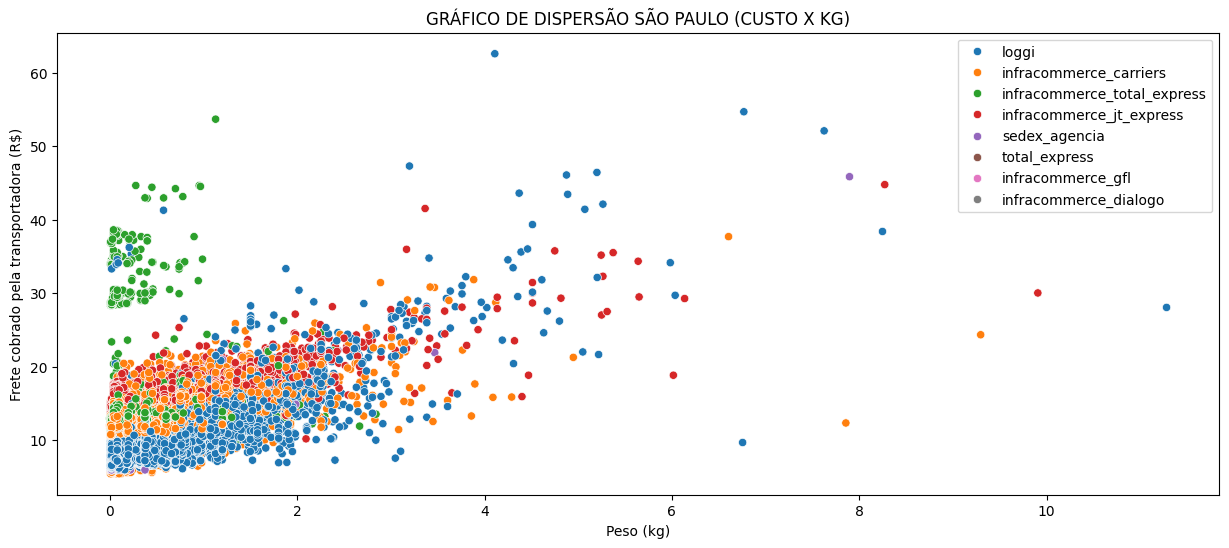

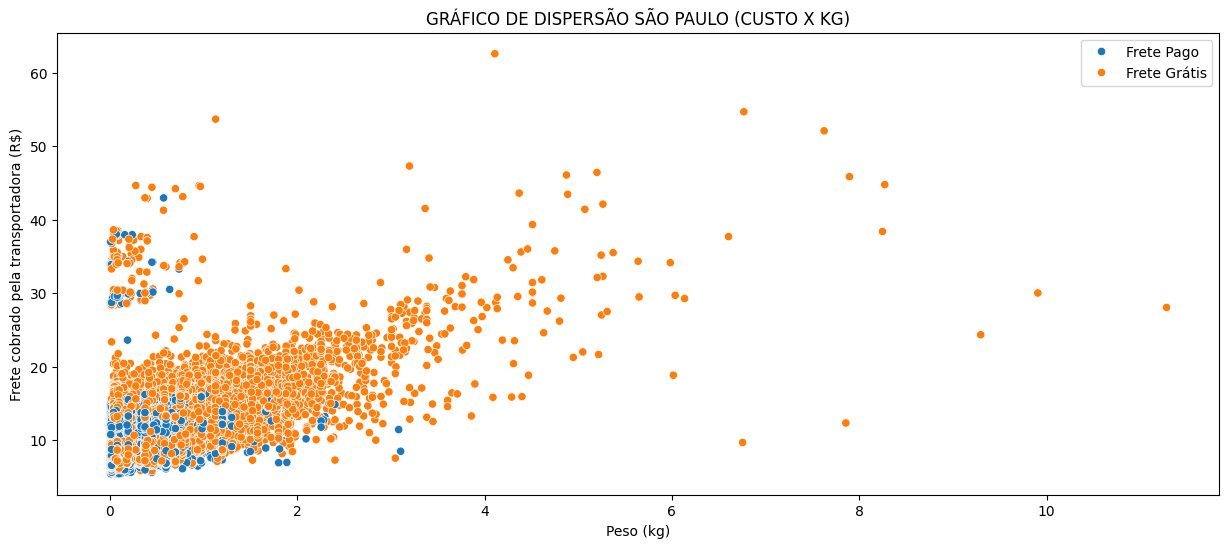

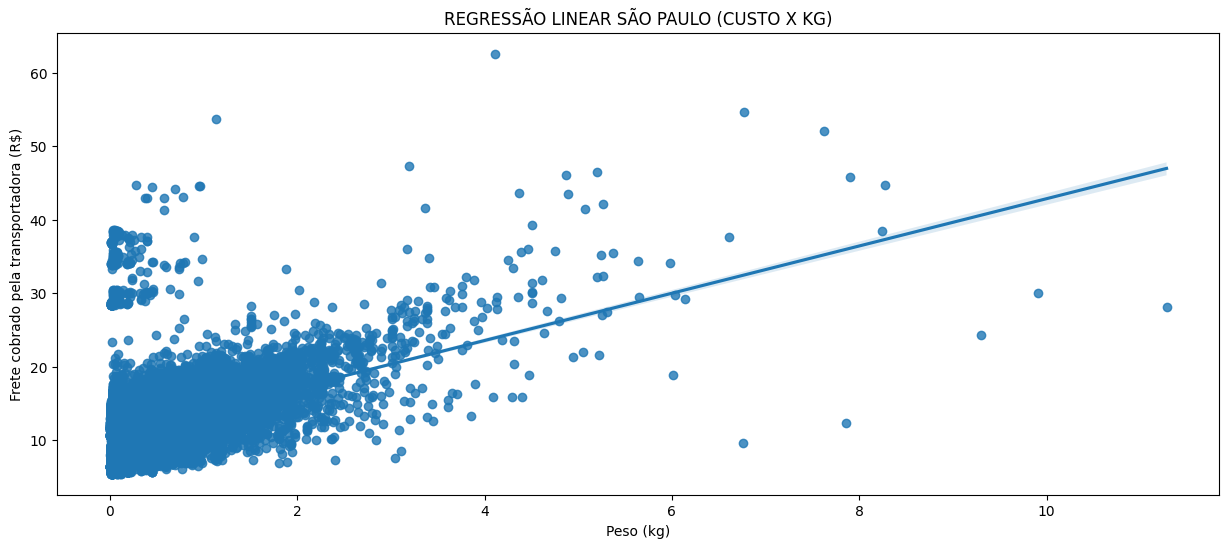

In [15]:
# Gráfico de dispenção
plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO SÃO PAULO (CUSTO CLIENTE X KG)')
sns.scatterplot(data=Estado_SP, x ="Peso (kg)", y="Frete Cobrado do Cliente (R$)", hue='Transportadora')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO SÃO PAULO (FRETE TOTAL X KG)')
sns.scatterplot(data=Estado_SP, x ="Peso (kg)", y="Frete Total", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO SÃO PAULO (FRETE TOTAL X KG)')
sns.scatterplot(data=Estado_SP, x ="Peso (kg)", y="Frete Total", hue='frete_status')
plt.legend(loc='upper right')
plt.show()


plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO SÃO PAULO (CUSTO X KG)')
sns.scatterplot(data=Estado_SP, x ="Peso (kg)", y="Frete cobrado pela transportadora (R$)", hue='Transportadora')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO SÃO PAULO (CUSTO X KG)')
sns.scatterplot(data=Estado_SP, x ="Peso (kg)", y="Frete cobrado pela transportadora (R$)", hue='frete_status')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title('REGRESSÃO LINEAR SÃO PAULO (CUSTO X KG)')
sns.regplot(data=Estado_SP,x="Peso (kg)",y="Frete cobrado pela transportadora (R$)")
plt.show()

# ANÁLISE DO CUSTO NO RIO DE JANEIRO

In [16]:
# Identificando o custo da maior transportadora do estado rj
base_rj = base_dados[base_dados['Estado']=='Rio de Janeiro']
base_rj.groupby('Transportadora')['Frete Total'].sum().sort_values(ascending=False)

Transportadora
infracommerce_carriers         492814.70
loggi                          113830.38
infracommerce_jt_express        86021.55
infracommerce_total_express     73346.36
pac_agencia                      7128.89
sedex_agencia                     604.38
infracommerce_dialogo              41.11
total_express                      27.52
Name: Frete Total, dtype: float64

In [17]:
# Verificando a media de preço por transportadora
base_rj.groupby('Transportadora')['Frete Total'].mean().sort_values(ascending=False)

Transportadora
total_express                  27.520000
sedex_agencia                  24.175200
infracommerce_jt_express       22.465800
infracommerce_total_express    21.674456
infracommerce_dialogo          20.555000
pac_agencia                    19.163683
loggi                          19.000230
infracommerce_carriers         18.823372
Name: Frete Total, dtype: float64

In [18]:
# Contando valores unicos por transportadora
base_rj['Transportadora'].value_counts()

Transportadora
infracommerce_carriers         26181
loggi                           5991
infracommerce_jt_express        3829
infracommerce_total_express     3384
pac_agencia                      372
sedex_agencia                     25
infracommerce_dialogo              2
total_express                      1
Name: count, dtype: int64

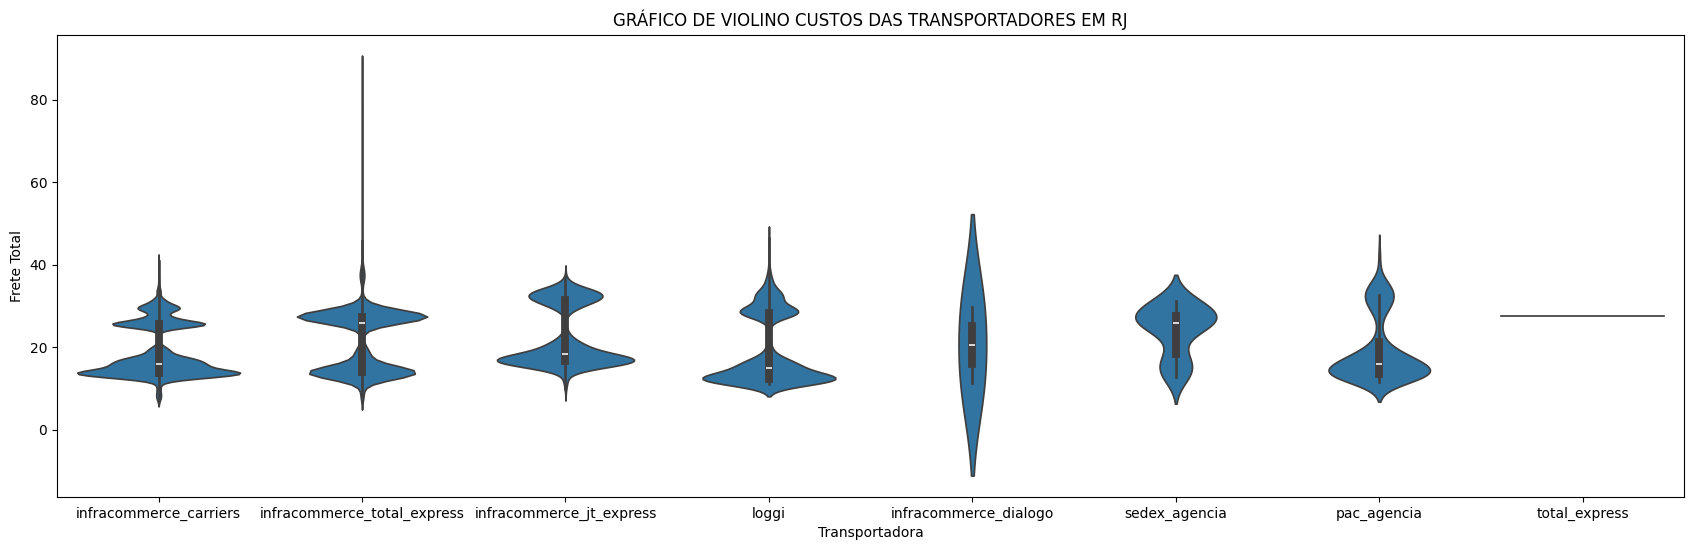

In [19]:
# Gráfico de violino do custo em rj
plt.figure(figsize=(21,6))
plt.title('GRÁFICO DE VIOLINO CUSTOS DAS TRANSPORTADORES EM RJ')
sns.violinplot(data=base_rj, x='Transportadora', y='Frete Total')
plt.show()

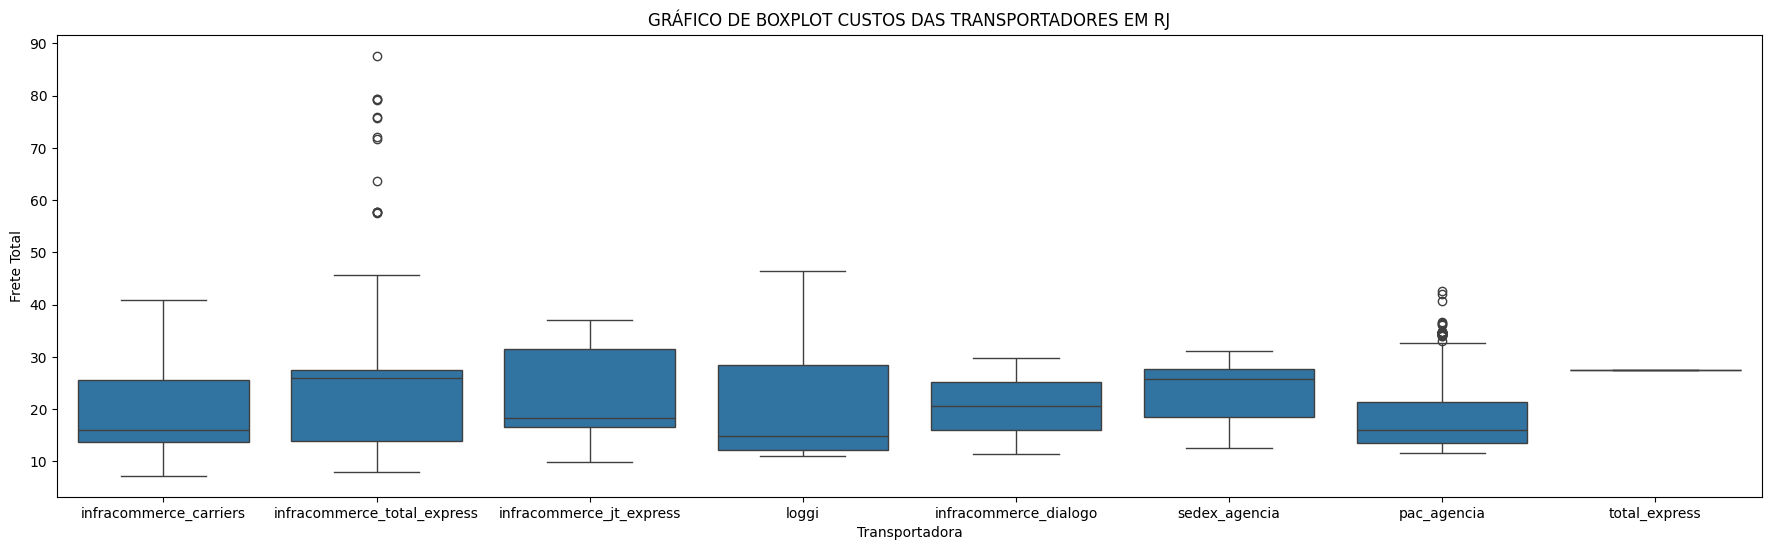

In [20]:
# Gráfico de boxplot do custo em RJ
plt.figure(figsize=(22,6))
plt.title('GRÁFICO DE BOXPLOT CUSTOS DAS TRANSPORTADORES EM RJ')
sns.boxplot(data=base_rj, x='Transportadora', y='Frete Total')
plt.show()

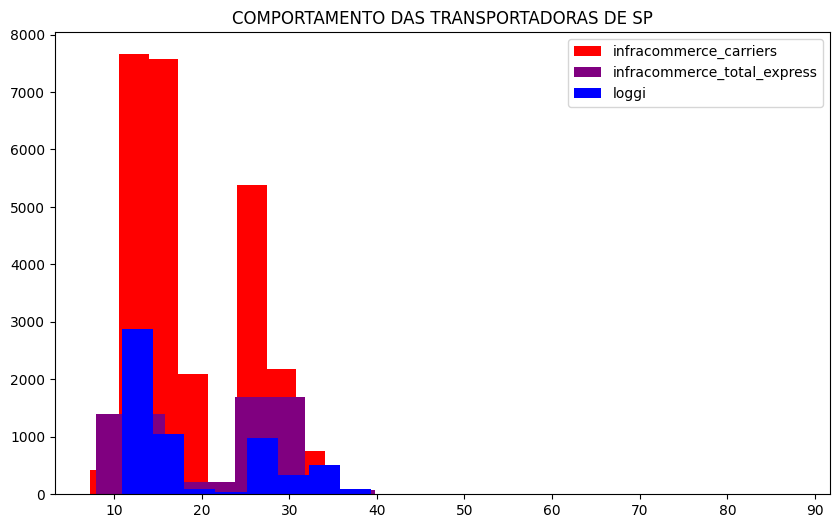

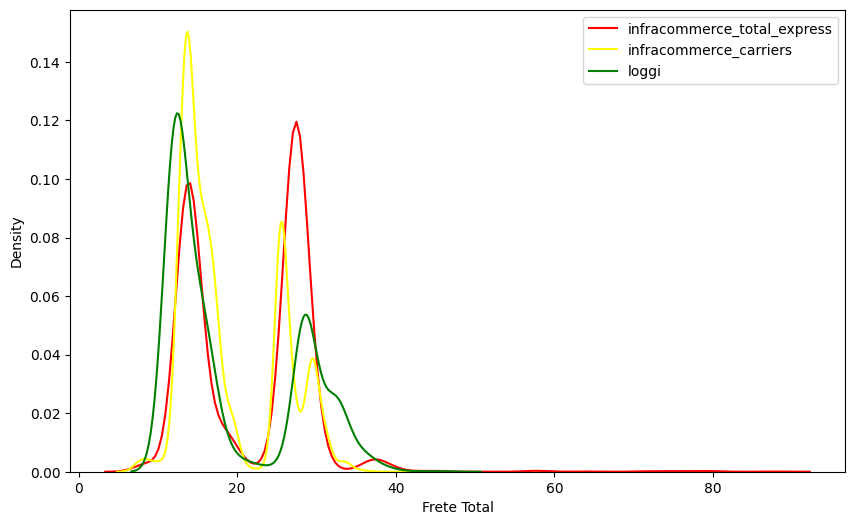

In [21]:
# HISTOGRAMA CUSTO EM RIO DE JANEIRO
infracommerce_carriers = base_rj[base_rj['Transportadora']=='infracommerce_carriers']
infracommerce_total_express = base_rj[base_rj['Transportadora']=='infracommerce_total_express']
pac_agencia = base_rj[base_rj['Transportadora']=='pac_agencia']
loggi = base_rj[base_rj['Transportadora']=='loggi']


plt.figure(figsize=(10,6))
plt.title('COMPORTAMENTO DAS TRANSPORTADORAS DE SP')
plt.hist(infracommerce_carriers['Frete Total'],bins=10,color='red', label='infracommerce_carriers')
plt.hist(infracommerce_total_express['Frete Total'],bins=10,color='purple', label='infracommerce_total_express')
plt.hist(loggi['Frete Total'],bins=10,color='blue', label='loggi')
plt.legend(loc='upper right')

# Gráfico de densidade
plt.figure(figsize=(10,6))
sns.kdeplot(data=infracommerce_total_express['Frete Total'] , color='red', label='infracommerce_total_express')
sns.kdeplot(data=infracommerce_carriers['Frete Total'], color='yellow', label='infracommerce_carriers')
sns.kdeplot(data=loggi['Frete Total'], color='green', label='loggi')
plt.legend(loc='upper right')
plt.show()

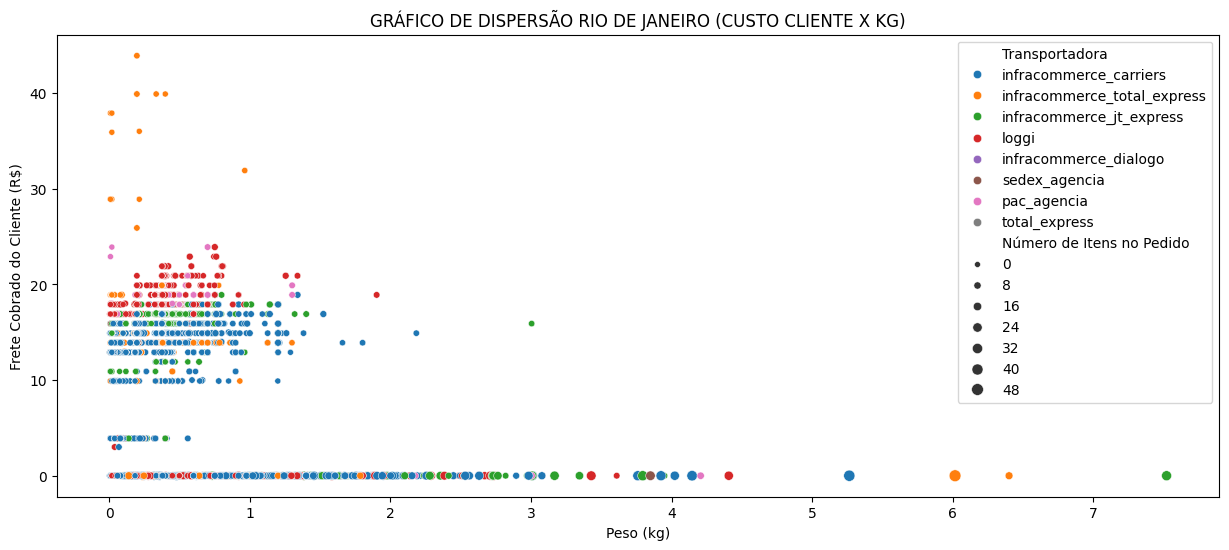

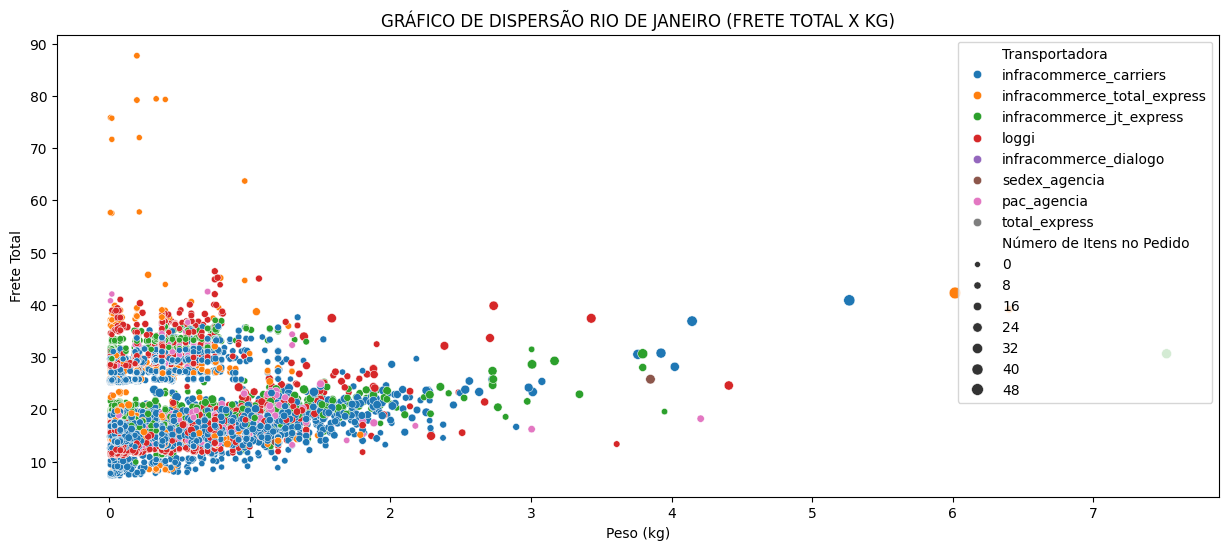

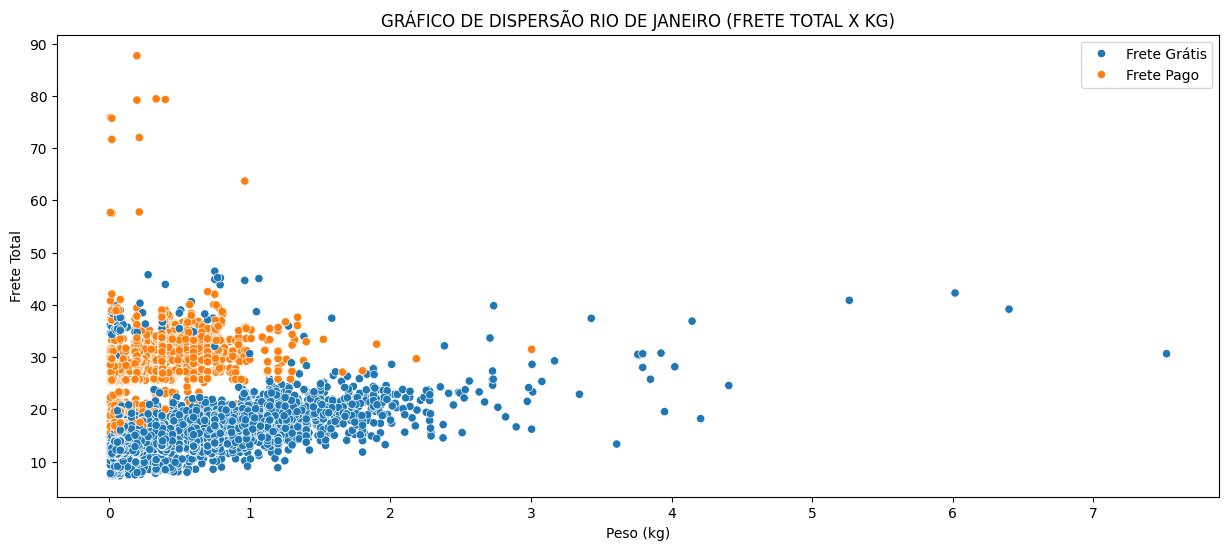

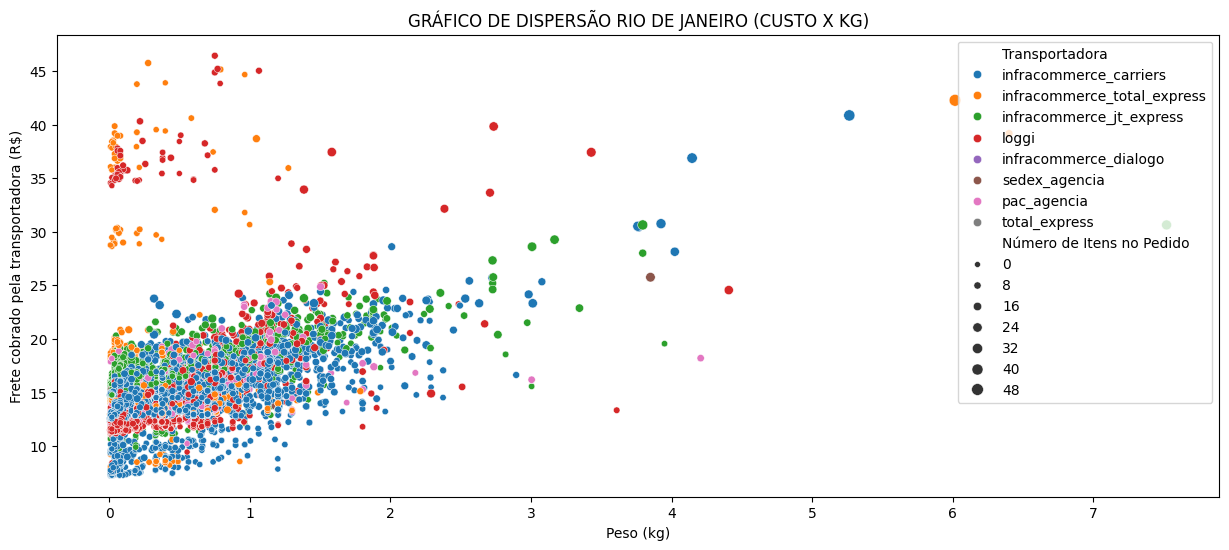

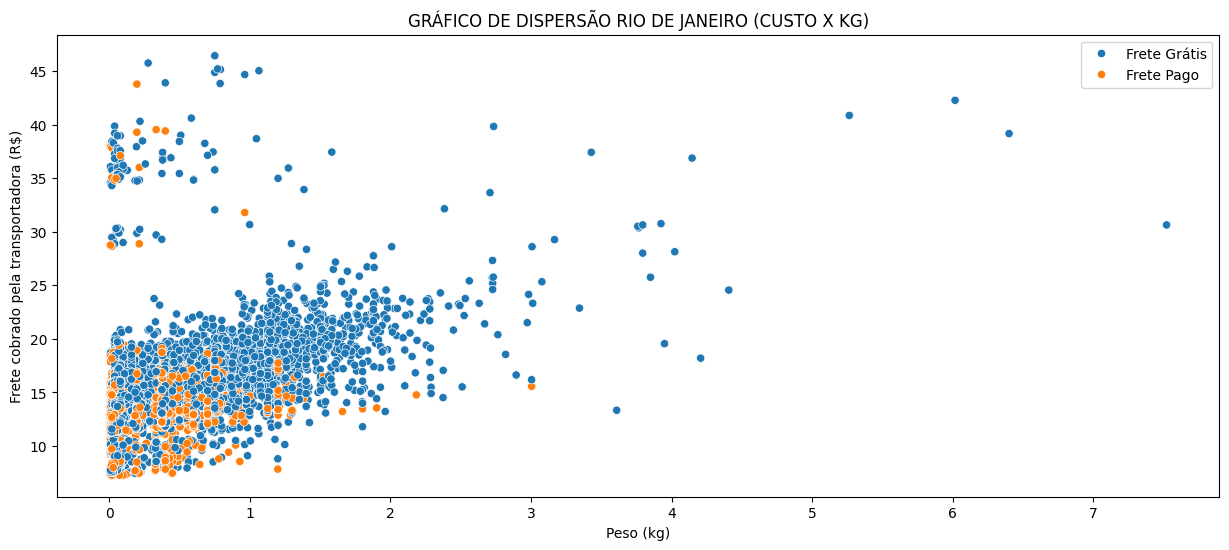

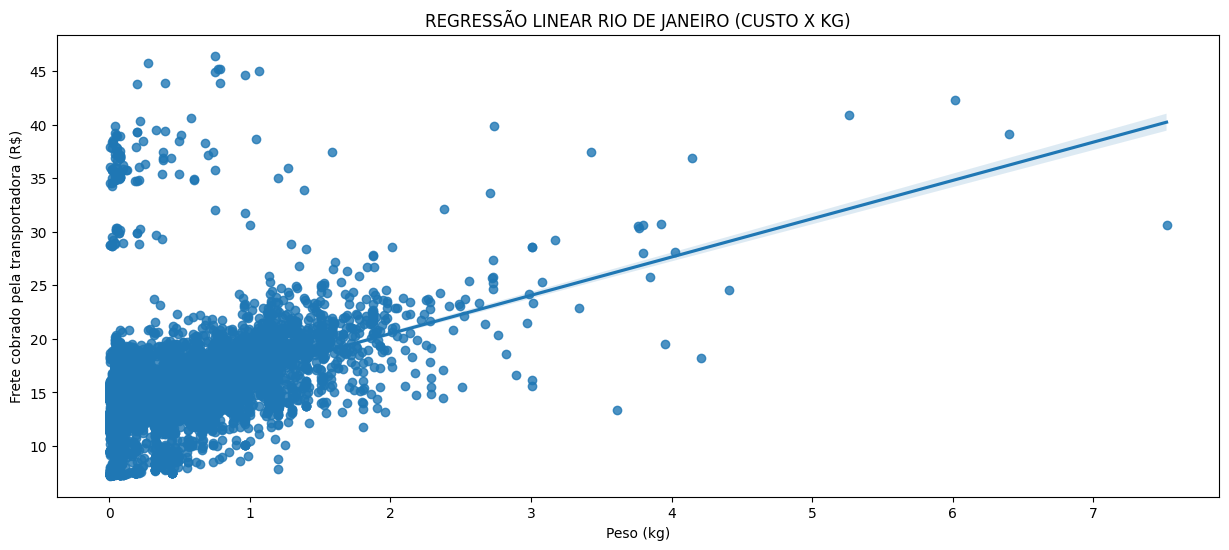

In [22]:
# Gráfico de dispenção

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO RIO DE JANEIRO (CUSTO CLIENTE X KG)')
sns.scatterplot(data=base_rj, x ="Peso (kg)", y="Frete Cobrado do Cliente (R$)", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO RIO DE JANEIRO (FRETE TOTAL X KG)')
sns.scatterplot(data=base_rj, x ="Peso (kg)", y="Frete Total", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO RIO DE JANEIRO (FRETE TOTAL X KG)')
sns.scatterplot(data=base_rj, x ="Peso (kg)", y="Frete Total", hue='frete_status')
plt.legend(loc='upper right')
plt.show()


plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO RIO DE JANEIRO (CUSTO X KG)')
sns.scatterplot(data=base_rj, x ="Peso (kg)", y="Frete cobrado pela transportadora (R$)", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO RIO DE JANEIRO (CUSTO X KG)')
sns.scatterplot(data=base_rj, x ="Peso (kg)", y="Frete cobrado pela transportadora (R$)", hue='frete_status')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title('REGRESSÃO LINEAR RIO DE JANEIRO (CUSTO X KG)')
sns.regplot(data=base_rj,x="Peso (kg)",y="Frete cobrado pela transportadora (R$)")
plt.show()

# ANÁLISE DO CUSTO EM MINAS GERAIS



In [23]:
# Identificando o custo da maior transportadora do estado MG
base_mg = base_dados[base_dados['Estado']=='Minas Gerais']
base_mg.groupby('Transportadora')['Frete Total'].sum().sort_values(ascending=False)

Transportadora
infracommerce_dialogo          183918.01
infracommerce_carriers         139186.28
loggi                           91972.15
infracommerce_jt_express        86212.54
infracommerce_total_express     29731.98
sedex_agencia                   12413.10
pac_agencia                      2258.21
total_express                      17.74
Name: Frete Total, dtype: float64

In [24]:
# Verificando a media de preço por transportadora em MG
base_mg.groupby('Transportadora')['Frete Total'].mean().sort_values(ascending=False)

print(base_mg['Frete Total'].mean())
print(base_mg['Frete Total'].std())

20.042236300866755
8.416881901794207


In [25]:
# Contando valores unicos por transportadora
base_mg['Transportadora'].value_counts()

Transportadora
infracommerce_dialogo          10322
infracommerce_carriers          6885
loggi                           4944
infracommerce_jt_express        3753
infracommerce_total_express      820
sedex_agencia                    393
pac_agencia                      110
total_express                      1
Name: count, dtype: int64

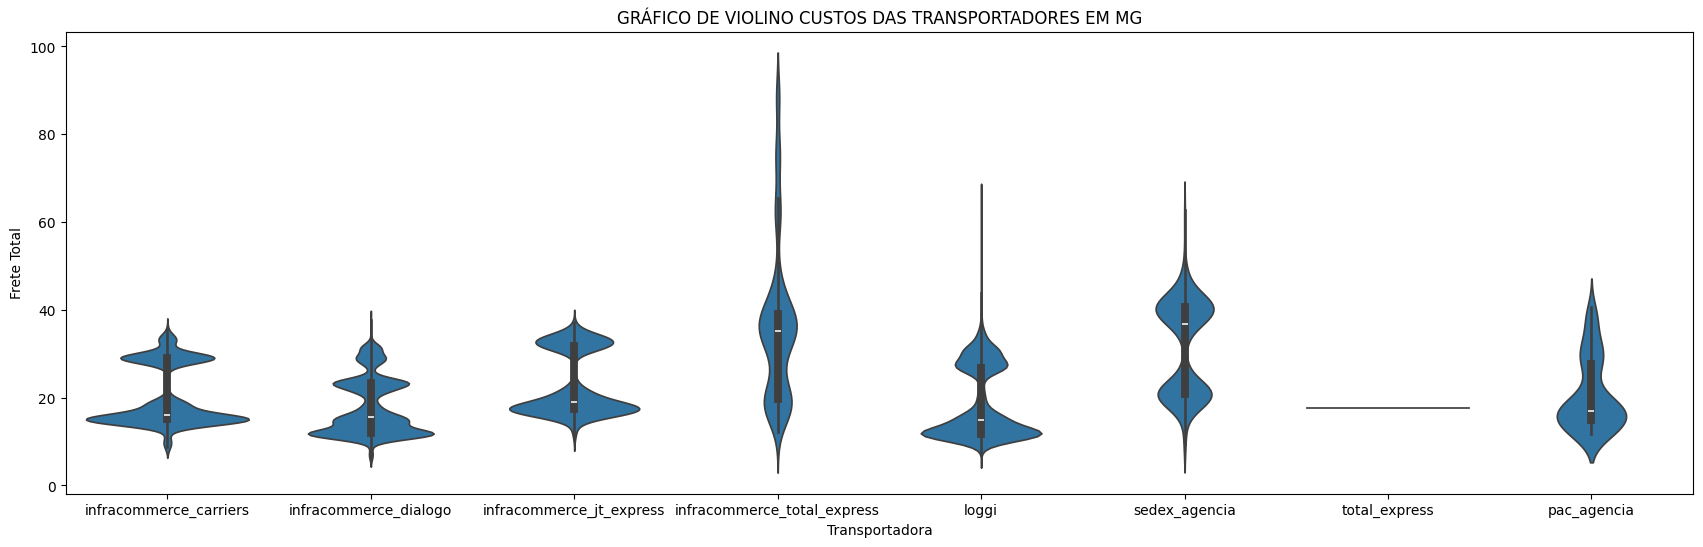

In [26]:
# Gráfico de violino do custo em mg
plt.figure(figsize=(21,6))
plt.title('GRÁFICO DE VIOLINO CUSTOS DAS TRANSPORTADORES EM MG')
sns.violinplot(data=base_mg, x='Transportadora', y='Frete Total')
plt.show()

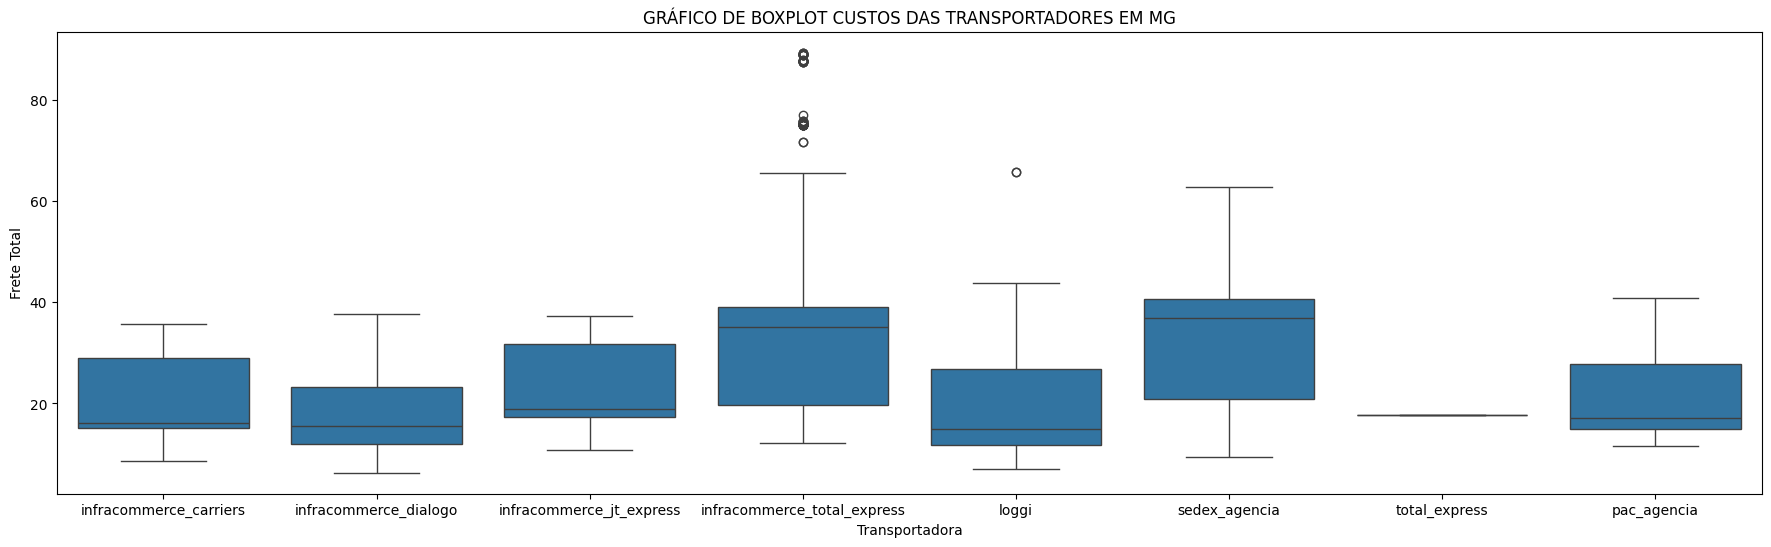

In [27]:
# Gráfico de boxplot do custo em MG
plt.figure(figsize=(22,6))
plt.title('GRÁFICO DE BOXPLOT CUSTOS DAS TRANSPORTADORES EM MG')
sns.boxplot(data=base_mg, x='Transportadora', y='Frete Total')
plt.show()

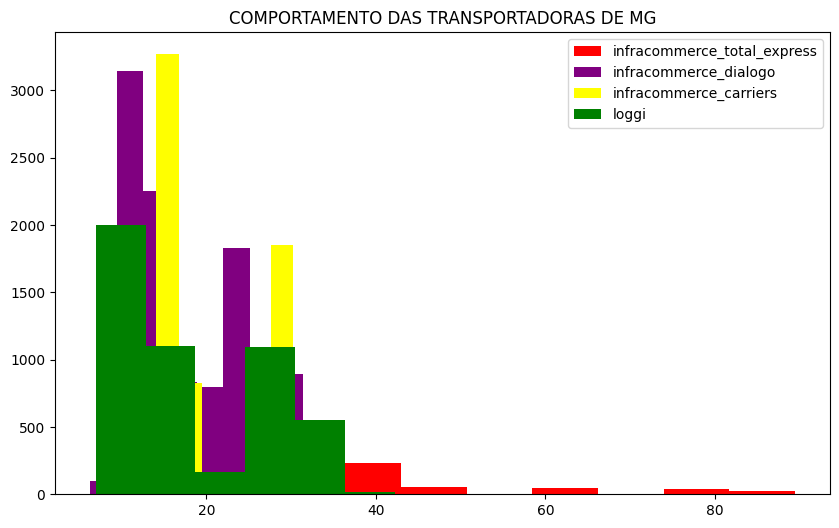

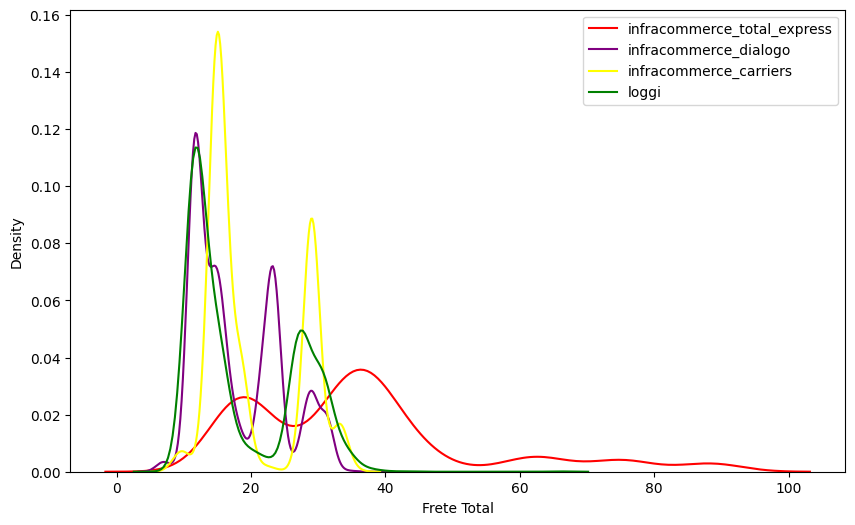

In [28]:
# HISTOHRAMA CUSTO EM MINAS GERAIS

infracommerce_total_express = base_mg[base_mg['Transportadora']=='infracommerce_total_express']
infracommerce_dialogo = base_mg[base_mg['Transportadora']=='infracommerce_dialogo']
infracommerce_carriers = base_mg[base_mg['Transportadora']=='infracommerce_carriers']
loggi = base_mg[base_mg['Transportadora']=='loggi']



plt.figure(figsize=(10,6))
plt.title('COMPORTAMENTO DAS TRANSPORTADORAS DE MG')
plt.hist(infracommerce_total_express['Frete Total'],bins=10,color='red', label='infracommerce_total_express')
plt.hist(infracommerce_dialogo['Frete Total'],bins=10,color='purple', label='infracommerce_dialogo')
plt.hist(infracommerce_carriers['Frete Total'],bins=10,color='yellow', label='infracommerce_carriers')
plt.hist(loggi ['Frete Total'],bins=10,color='green', label='loggi')
plt.legend(loc='upper right')


# Gráfico de densidade
plt.figure(figsize=(10,6))
sns.kdeplot(data=infracommerce_total_express['Frete Total'] , color='red', label='infracommerce_total_express')
sns.kdeplot(data=infracommerce_dialogo['Frete Total'], color='purple', label='infracommerce_dialogo')
sns.kdeplot(data=infracommerce_carriers['Frete Total'], color='yellow', label='infracommerce_carriers')
sns.kdeplot(data=loggi['Frete Total'], color='green', label='loggi')
plt.legend(loc='upper right')
plt.show()

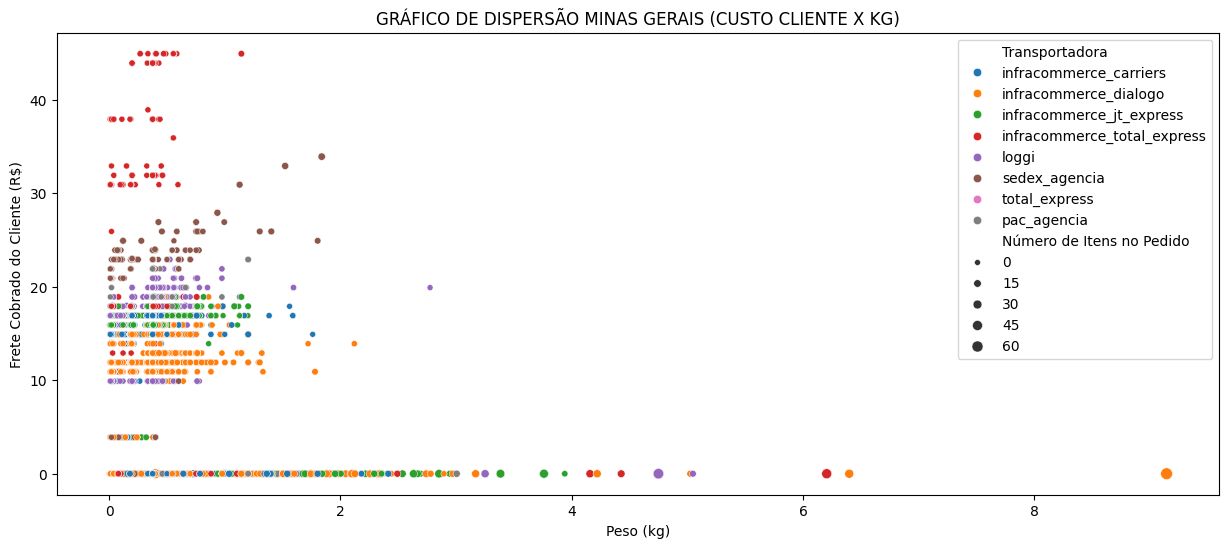

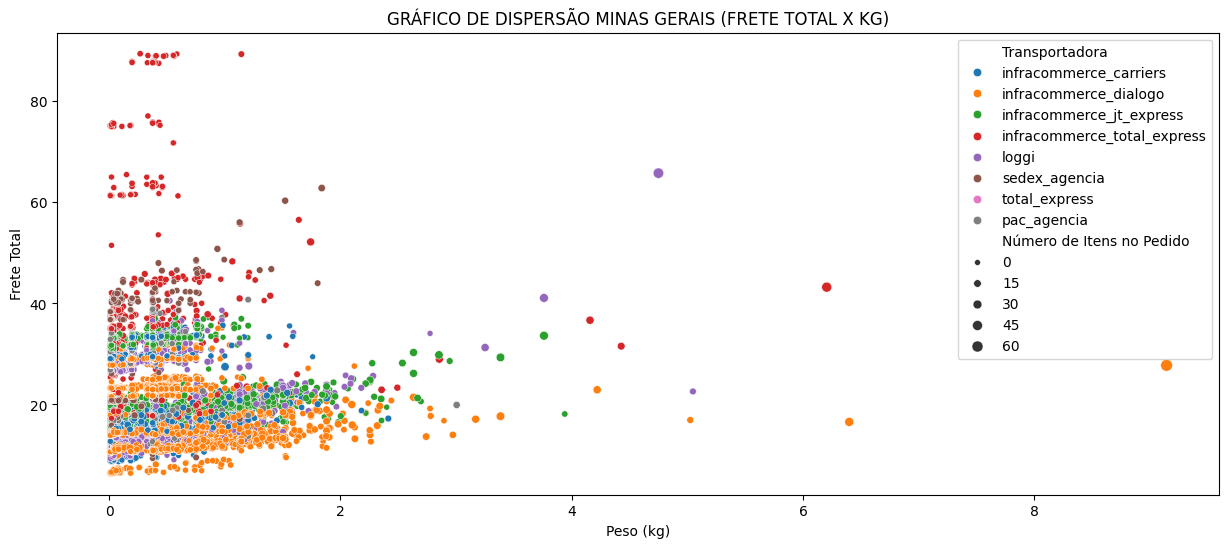

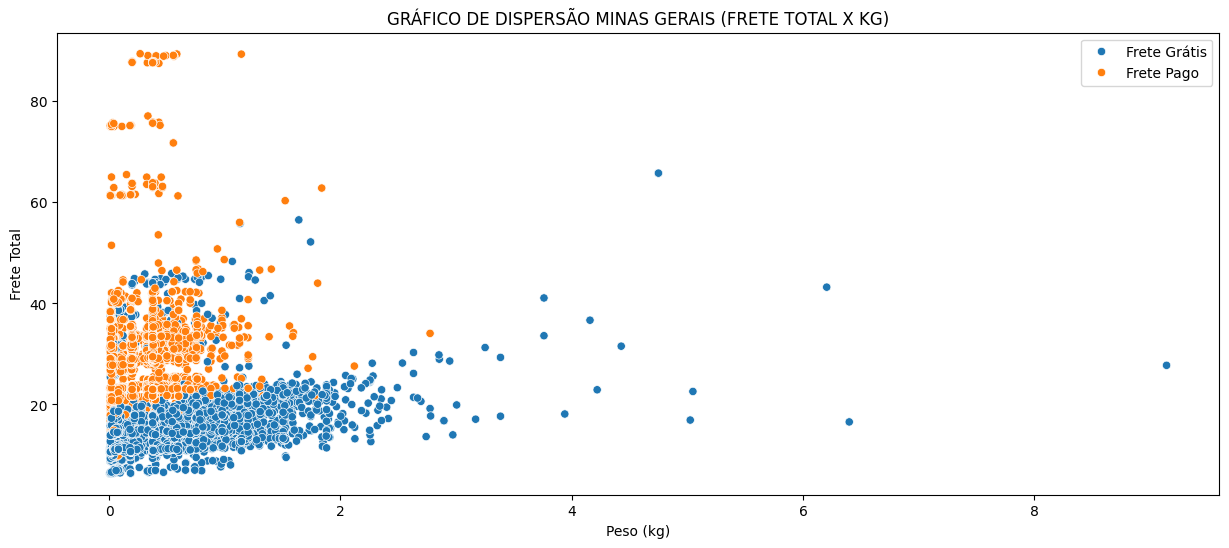

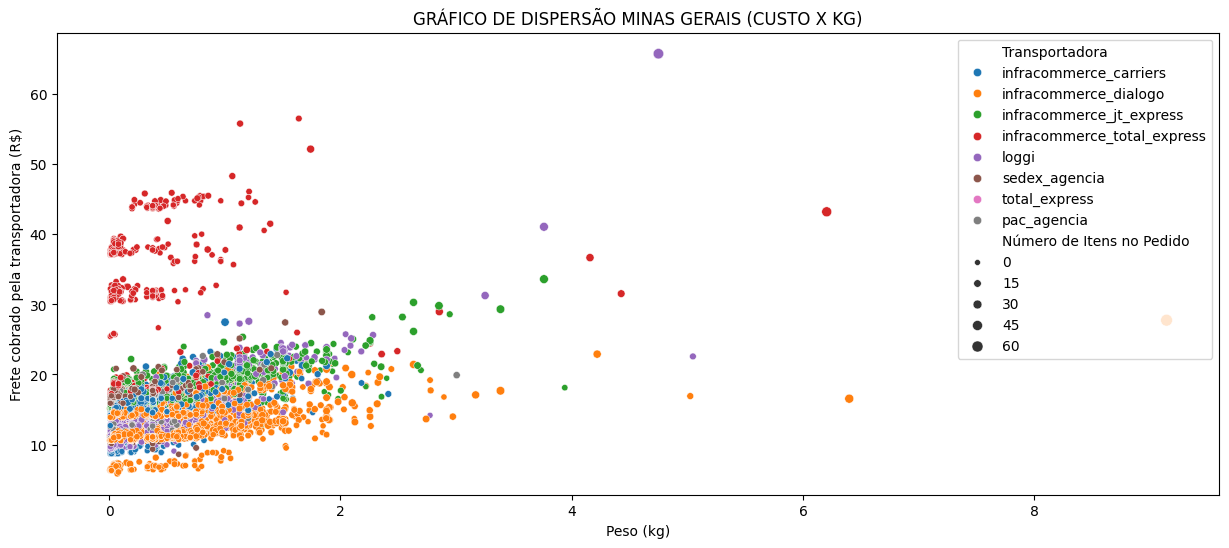

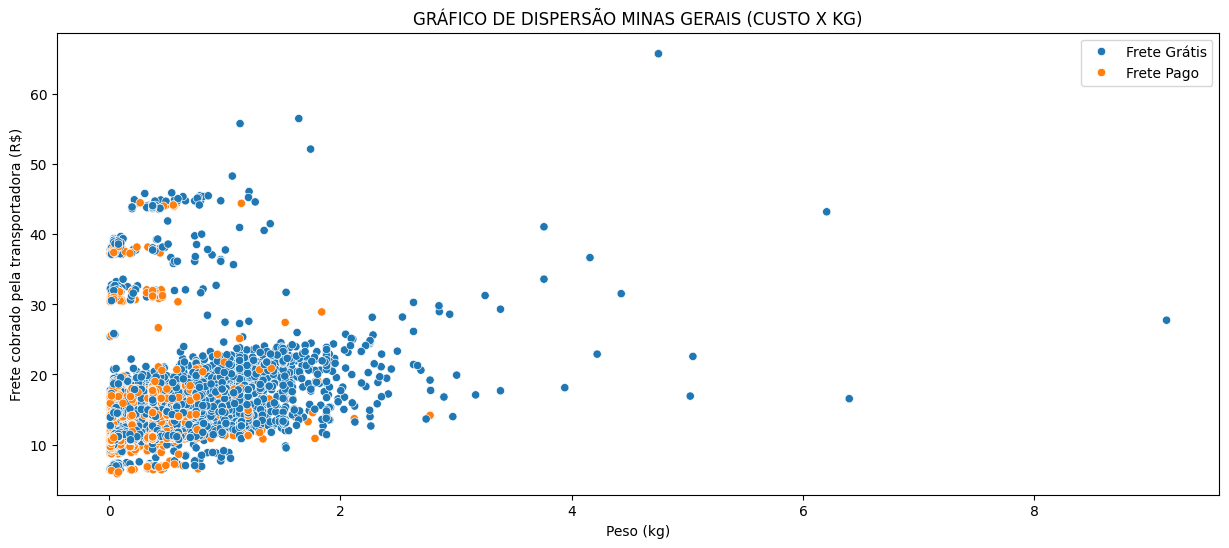

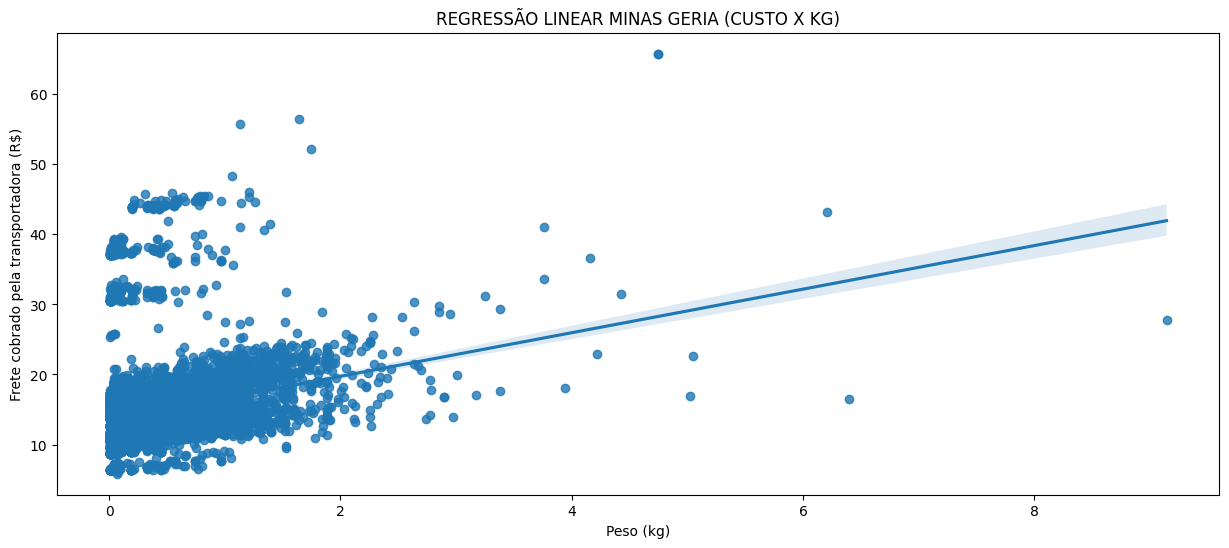

In [29]:
# Gráfico de dispenção

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO MINAS GERAIS (CUSTO CLIENTE X KG)')
sns.scatterplot(data=base_mg, x ="Peso (kg)", y="Frete Cobrado do Cliente (R$)", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO MINAS GERAIS (FRETE TOTAL X KG)')
sns.scatterplot(data=base_mg, x ="Peso (kg)", y="Frete Total", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO MINAS GERAIS (FRETE TOTAL X KG)')
sns.scatterplot(data=base_mg, x ="Peso (kg)", y="Frete Total", hue='frete_status')
plt.legend(loc='upper right')
plt.show()


plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO MINAS GERAIS (CUSTO X KG)')
sns.scatterplot(data=base_mg, x ="Peso (kg)", y="Frete cobrado pela transportadora (R$)", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO MINAS GERAIS (CUSTO X KG)')
sns.scatterplot(data=base_mg, x ="Peso (kg)", y="Frete cobrado pela transportadora (R$)", hue='frete_status')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title('REGRESSÃO LINEAR MINAS GERIA (CUSTO X KG)')
sns.regplot(data=base_mg,x="Peso (kg)",y="Frete cobrado pela transportadora (R$)")
plt.show()

# ANÁLISE DO CUSTO NO CEARÁ

In [30]:
# Identificando o custo da maior transportadora do estado CE
base_ce = base_dados[base_dados['Estado']=='Ceará']
base_ce.groupby('Transportadora')['Frete Total'].sum().sort_values(ascending=False)

Transportadora
infracommerce_dialogo          150981.82
infracommerce_jt_express       114727.20
loggi                           66737.36
infracommerce_total_express     20192.02
sedex_agencia                    6039.26
infracommerce_carriers           4958.24
pac_agencia                       780.45
Name: Frete Total, dtype: float64

In [31]:
# Verificando a media de preço por transportadora em CE
base_mg.groupby('Transportadora')['Frete Total'].mean().sort_values(ascending=False)

print(base_ce['Frete Total'].mean())
print(base_ce['Frete Total'].std())

27.268508680035914
11.31085309309079


In [32]:
# Contando valores unicos por transportadora
base_ce['Transportadora'].value_counts()

Transportadora
infracommerce_dialogo          6264
infracommerce_jt_express       3637
loggi                          2594
infracommerce_total_express     580
infracommerce_carriers          182
sedex_agencia                    93
pac_agencia                      14
Name: count, dtype: int64

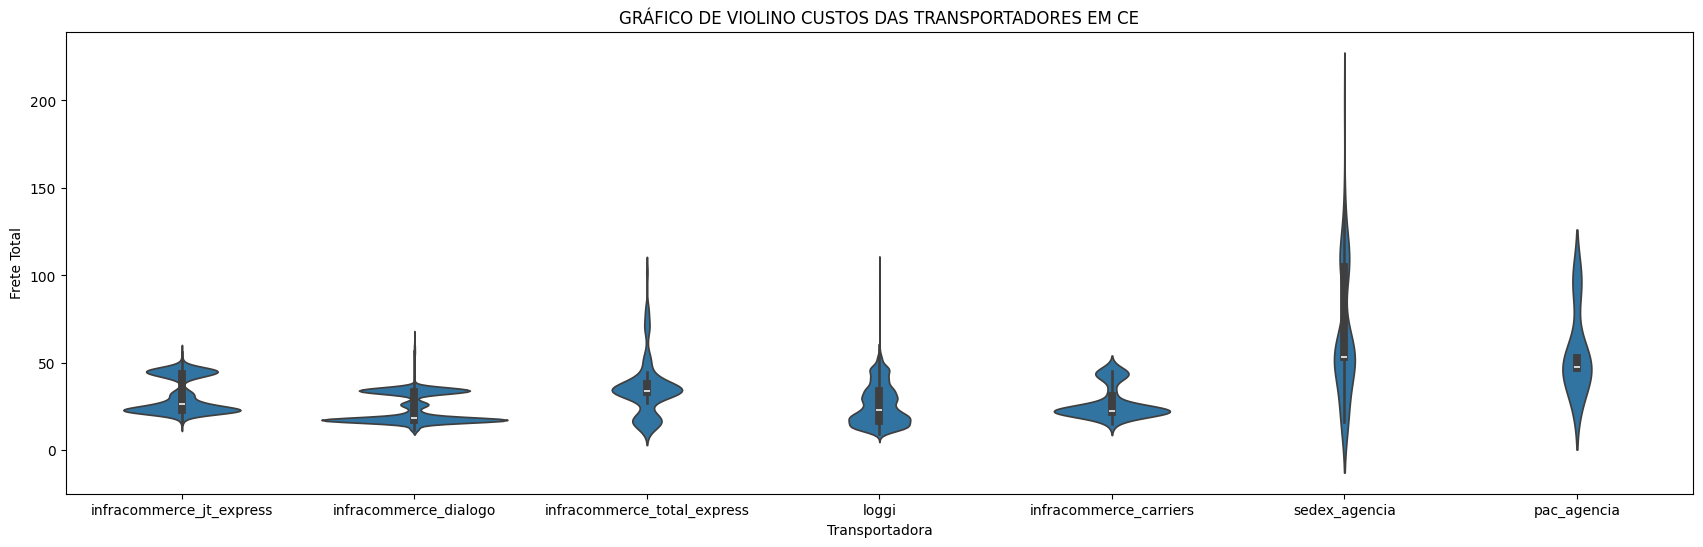

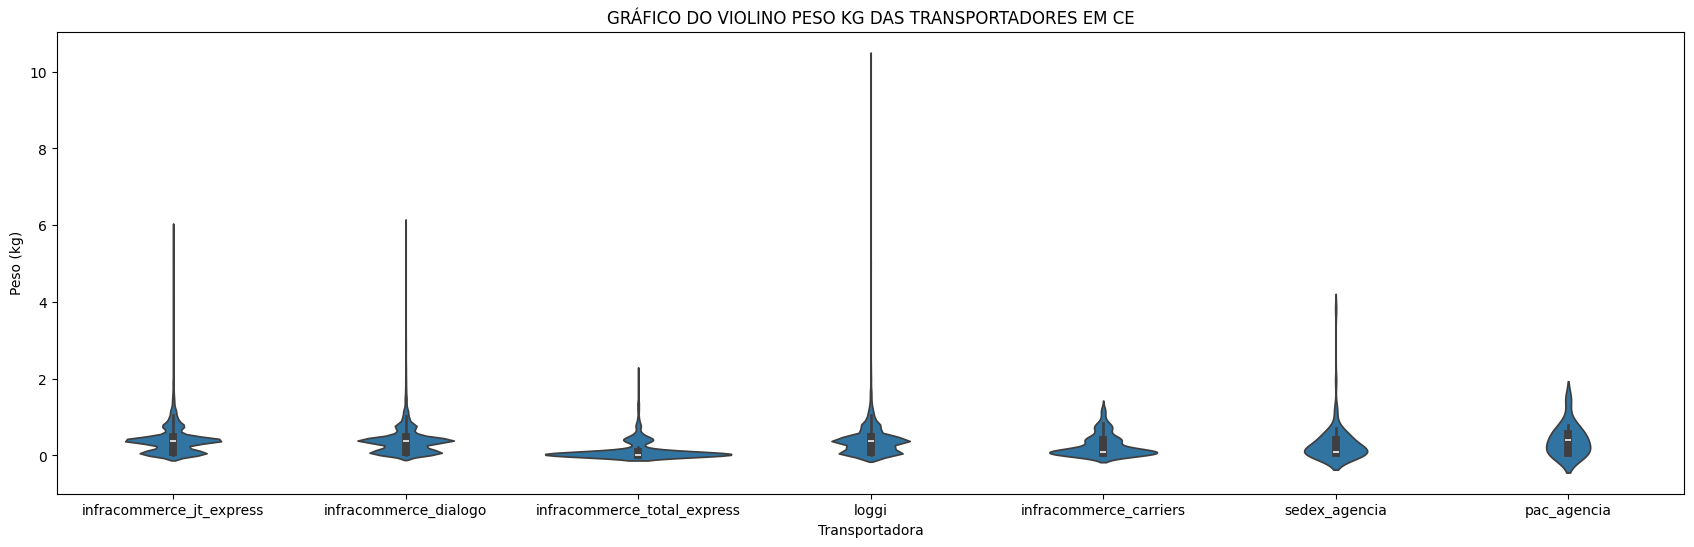

In [33]:
# Gráfico de violino do custo em ce
plt.figure(figsize=(21,6))
plt.title('GRÁFICO DE VIOLINO CUSTOS DAS TRANSPORTADORES EM CE')
sns.violinplot(data=base_ce, x='Transportadora', y='Frete Total')
plt.show()

# Peso x Transportadora
plt.figure(figsize=(21,6))
plt.title('GRÁFICO DO VIOLINO PESO KG DAS TRANSPORTADORES EM CE')
sns.violinplot(data=base_ce, x='Transportadora', y='Peso (kg)')
plt.show()

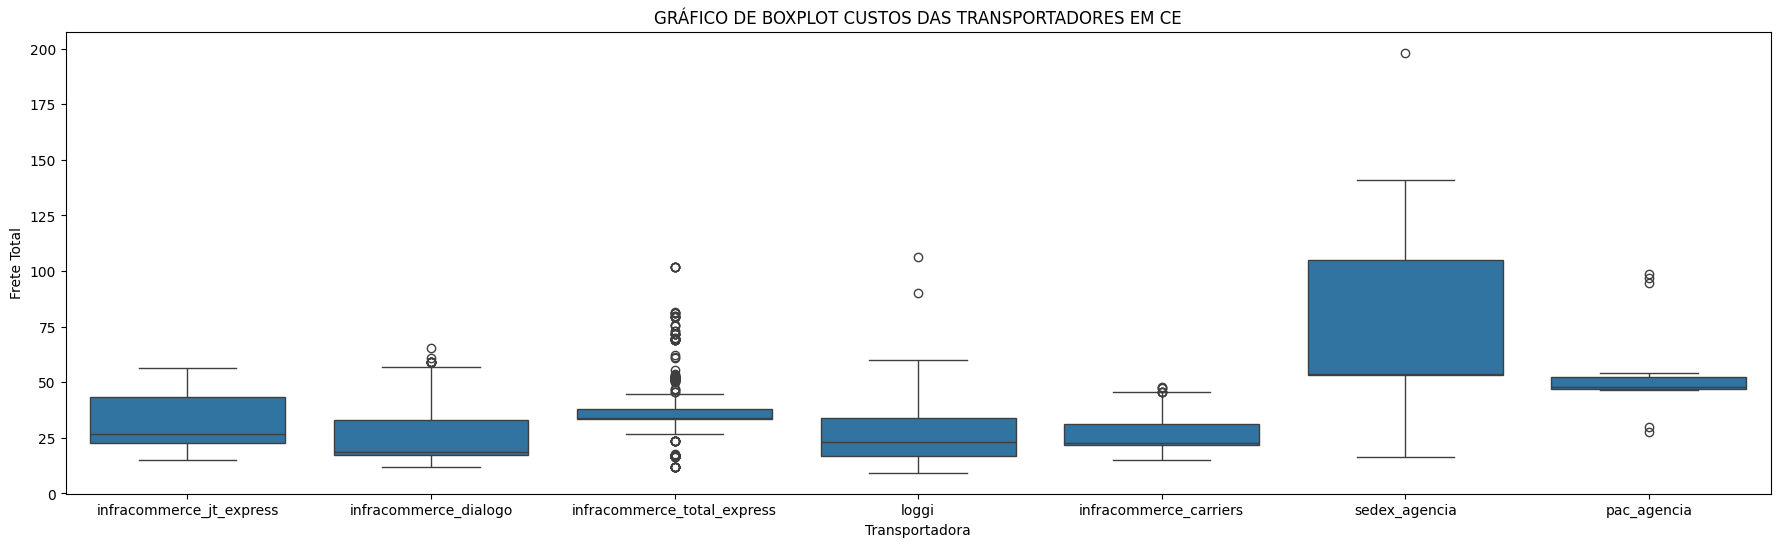

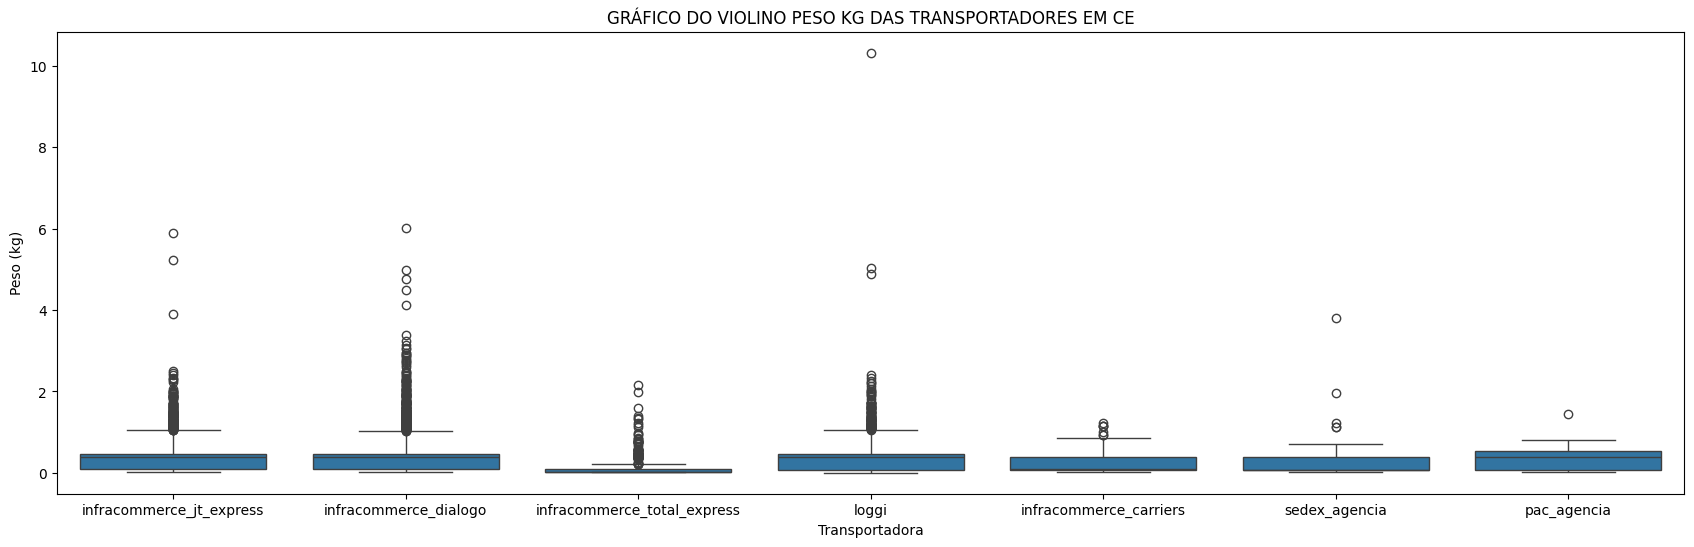

In [34]:
# Gráfico de boxplot do custo em CE
plt.figure(figsize=(22,6))
plt.title('GRÁFICO DE BOXPLOT CUSTOS DAS TRANSPORTADORES EM CE')
sns.boxplot(data=base_ce, x='Transportadora', y='Frete Total')
plt.show()

# Peso x Transportadora
plt.figure(figsize=(21,6))
plt.title('GRÁFICO DO VIOLINO PESO KG DAS TRANSPORTADORES EM CE')
sns.boxplot(data=base_ce, x='Transportadora', y='Peso (kg)')
plt.show()

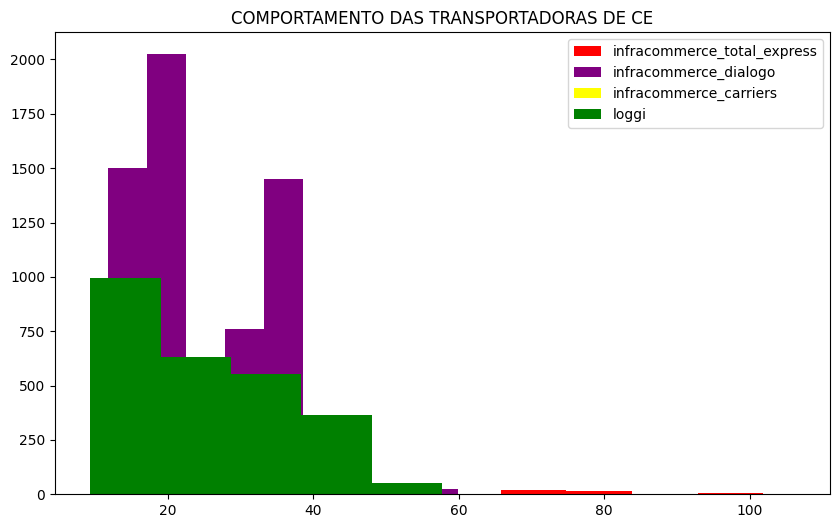

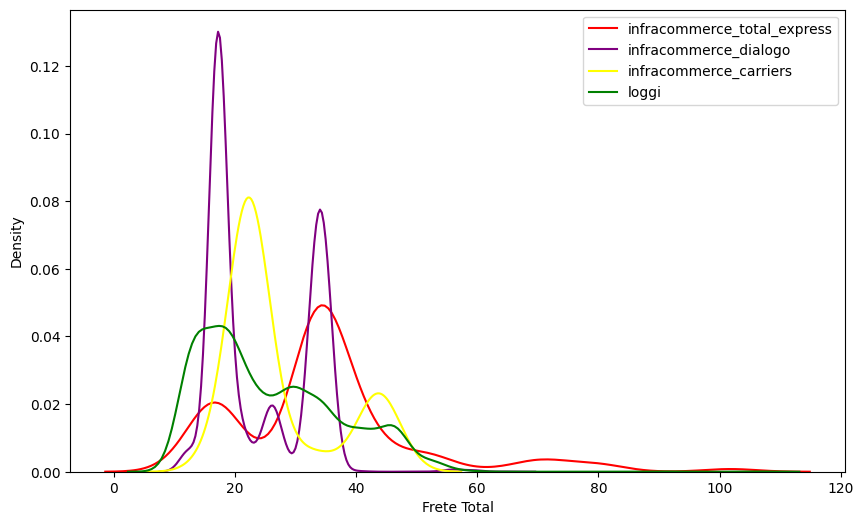

In [35]:
# HISTOHRAMA CUSTO EM CEARÁ

infracommerce_total_express = base_ce[base_ce['Transportadora']=='infracommerce_total_express']
infracommerce_dialogo = base_ce[base_ce['Transportadora']=='infracommerce_dialogo']
infracommerce_carriers = base_ce[base_ce['Transportadora']=='infracommerce_carriers']
loggi = base_ce[base_ce['Transportadora']=='loggi']



plt.figure(figsize=(10,6))
plt.title('COMPORTAMENTO DAS TRANSPORTADORAS DE CE')
plt.hist(infracommerce_total_express['Frete Total'],bins=10,color='red', label='infracommerce_total_express')
plt.hist(infracommerce_dialogo['Frete Total'],bins=10,color='purple', label='infracommerce_dialogo')
plt.hist(infracommerce_carriers['Frete Total'],bins=10,color='yellow', label='infracommerce_carriers')
plt.hist(loggi ['Frete Total'],bins=10,color='green', label='loggi')
plt.legend(loc='upper right')


# Gráfico de densidade
plt.figure(figsize=(10,6))
sns.kdeplot(data=infracommerce_total_express['Frete Total'] , color='red', label='infracommerce_total_express')
sns.kdeplot(data=infracommerce_dialogo['Frete Total'], color='purple', label='infracommerce_dialogo')
sns.kdeplot(data=infracommerce_carriers['Frete Total'], color='yellow', label='infracommerce_carriers')
sns.kdeplot(data=loggi['Frete Total'], color='green', label='loggi')
plt.legend(loc='upper right')
plt.show()

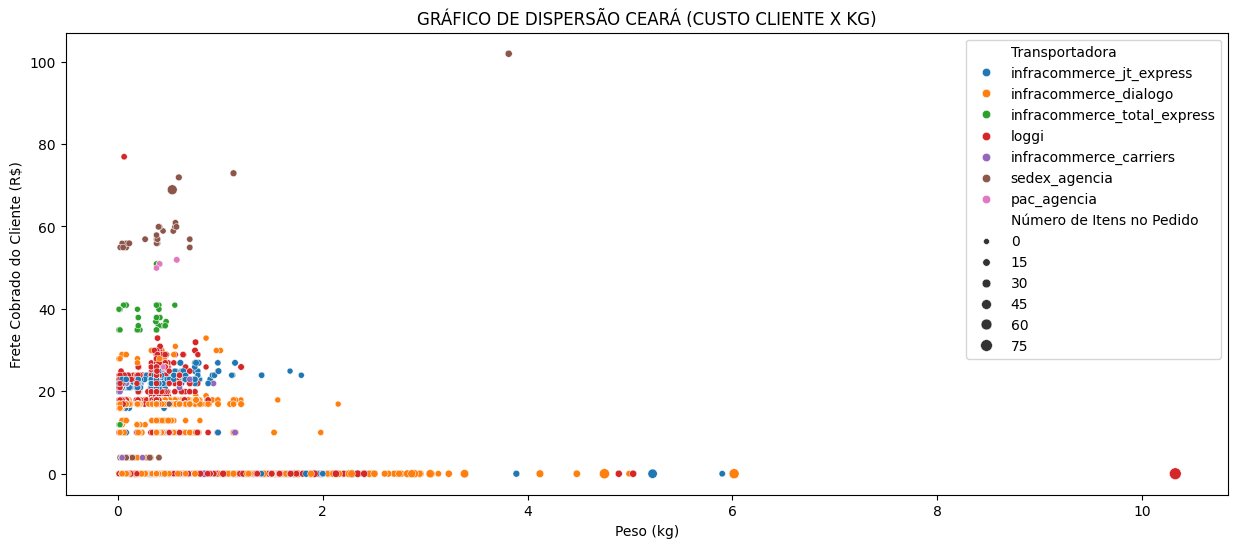

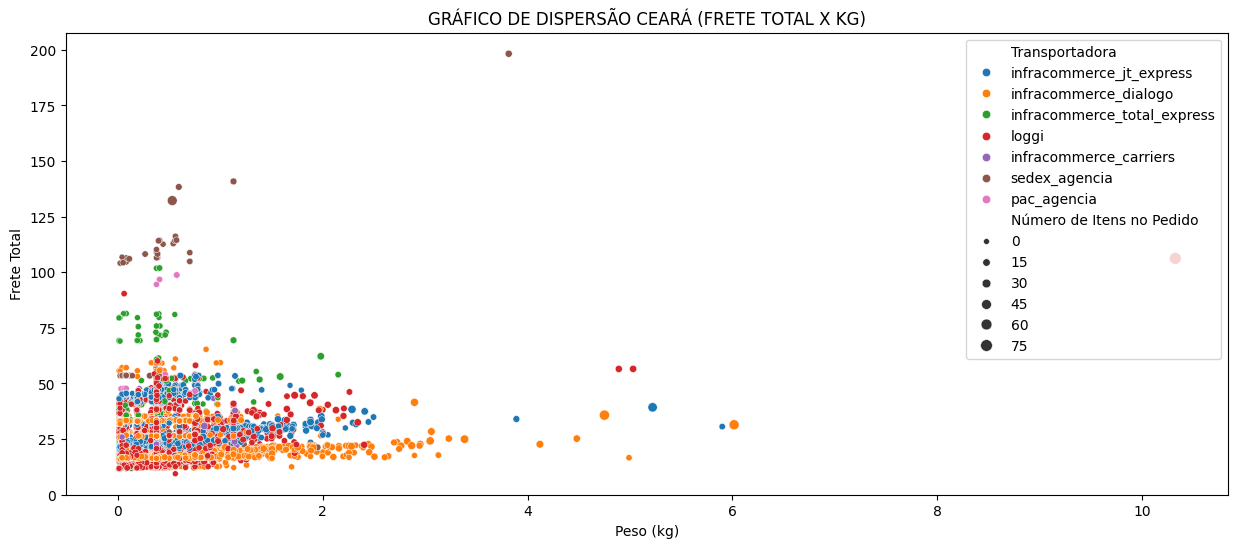

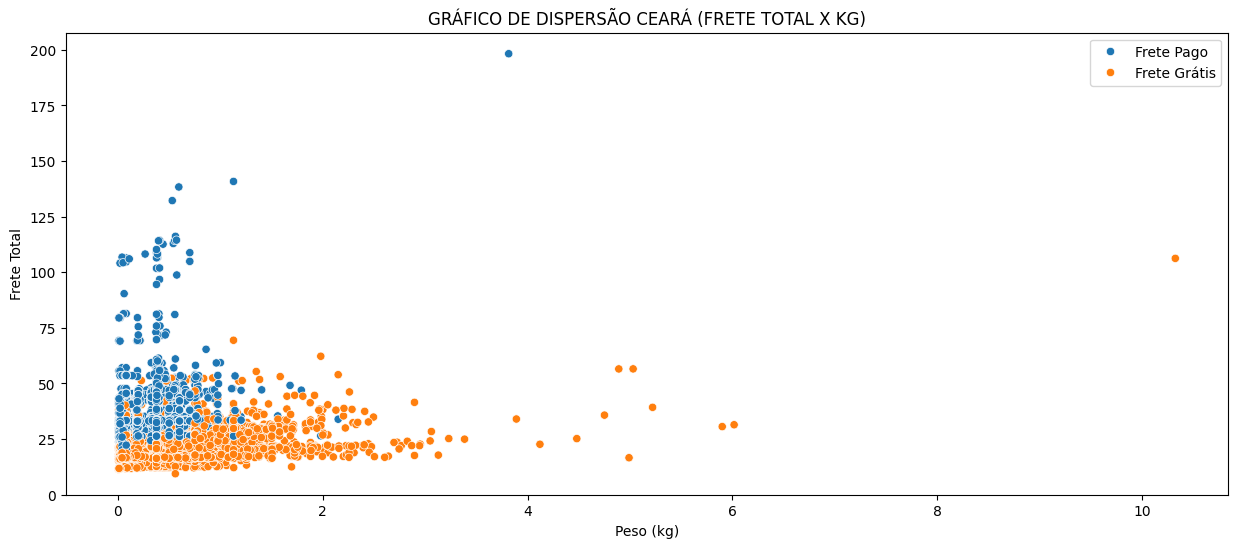

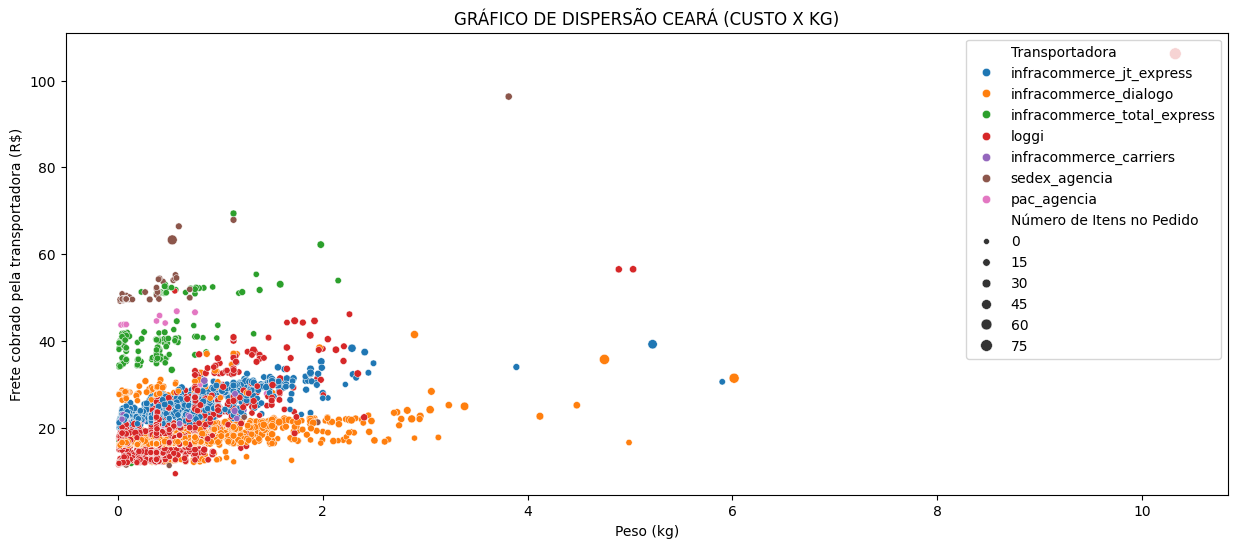

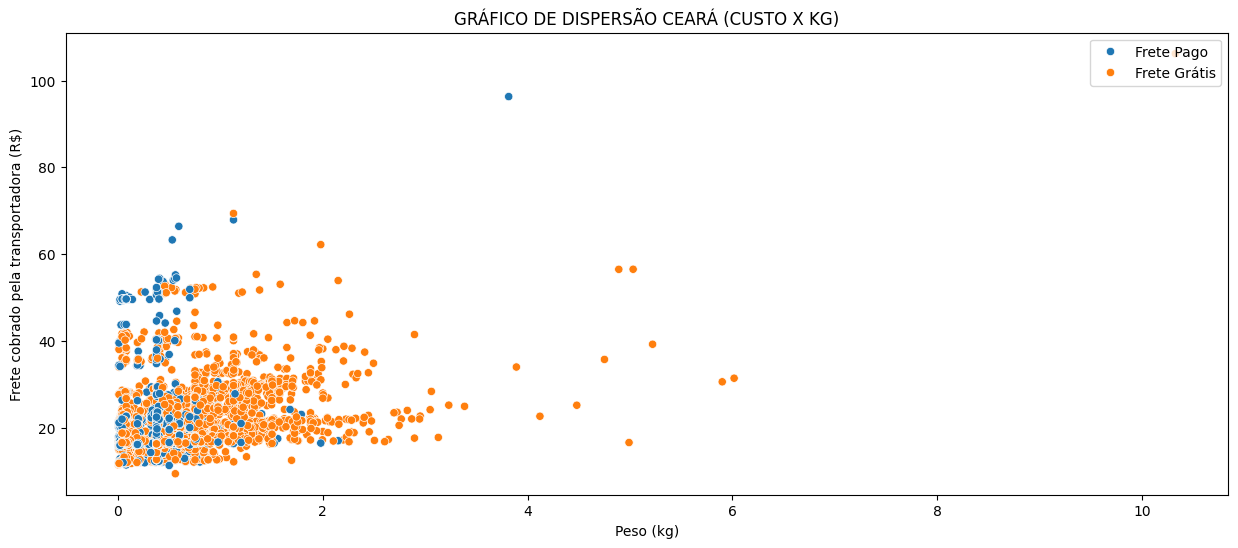

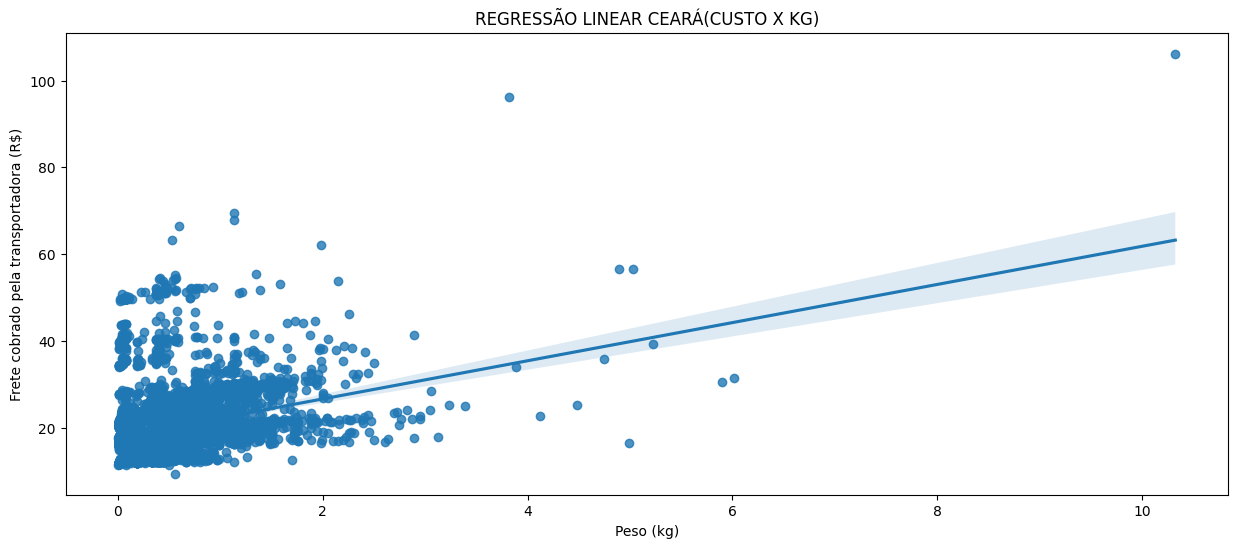

In [36]:
# Gráfico de dispenção

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO CEARÁ (CUSTO CLIENTE X KG)')
sns.scatterplot(data=base_ce, x ="Peso (kg)", y="Frete Cobrado do Cliente (R$)", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO CEARÁ (FRETE TOTAL X KG)')
sns.scatterplot(data=base_ce, x ="Peso (kg)", y="Frete Total", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO CEARÁ (FRETE TOTAL X KG)')
sns.scatterplot(data=base_ce, x ="Peso (kg)", y="Frete Total", hue='frete_status')
plt.legend(loc='upper right')
plt.show()


plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO CEARÁ (CUSTO X KG)')
sns.scatterplot(data=base_ce, x ="Peso (kg)", y="Frete cobrado pela transportadora (R$)", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO CEARÁ (CUSTO X KG)')
sns.scatterplot(data=base_ce, x ="Peso (kg)", y="Frete cobrado pela transportadora (R$)", hue='frete_status')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title('REGRESSÃO LINEAR CEARÁ(CUSTO X KG)')
sns.regplot(data=base_ce,x="Peso (kg)",y="Frete cobrado pela transportadora (R$)")
plt.show()

# ANÁLISE DO CUSTO EM TODOS OS ESTADOS

In [37]:
# Identificando o custo da maior transportadora
base_dados.groupby('Transportadora')['Frete Total'].sum().sort_values(ascending=False)

Transportadora
infracommerce_carriers         2026329.92
loggi                          1480750.31
infracommerce_dialogo          1333380.33
infracommerce_jt_express       1153161.83
infracommerce_total_express     950097.64
sedex_agencia                    50229.63
pac_agencia                      38745.85
total_express                      585.16
infracommerce_gfl                   16.66
Name: Frete Total, dtype: float64

In [38]:
# Verificando a media de preço por transportadora
base_dados.groupby('Transportadora')['Frete Total'].mean().sort_values(ascending=False)

print(base_dados['Frete Total'].mean())
print(base_dados['Frete Total'].std())

20.198667828813978
9.73795891757184


In [39]:
# Contando valores unicos por transportadora
base_dados['Transportadora'].value_counts()

Transportadora
infracommerce_carriers         108038
loggi                           87978
infracommerce_dialogo           63305
infracommerce_jt_express        45994
infracommerce_total_express     40265
pac_agencia                      1396
sedex_agencia                    1202
total_express                      26
infracommerce_gfl                   2
Name: count, dtype: int64

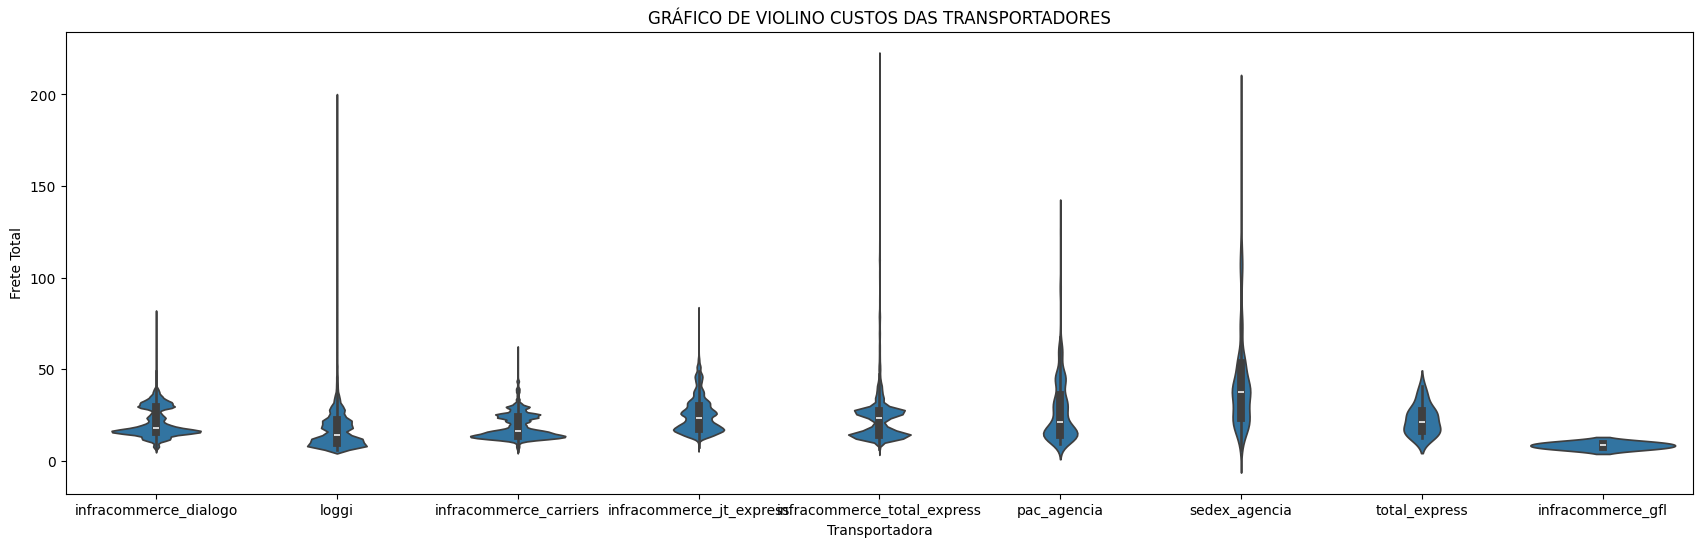

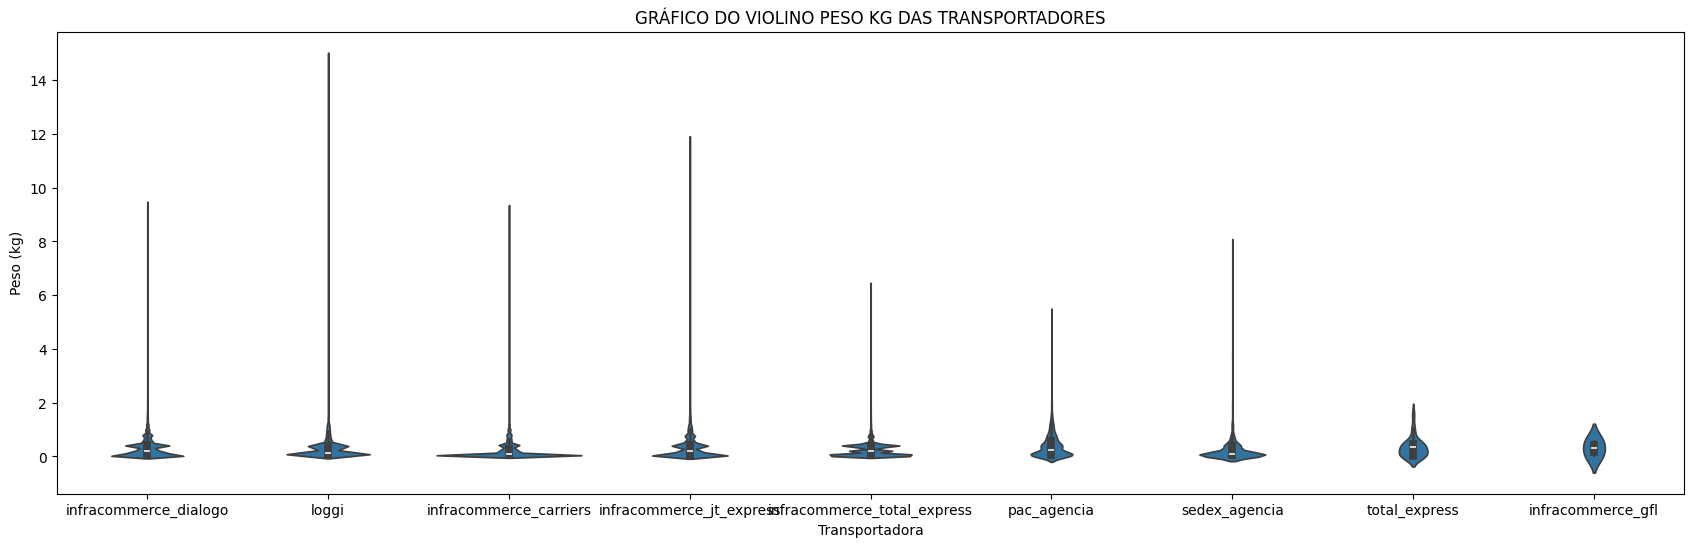

In [40]:
# Gráfico de violino do custo
plt.figure(figsize=(21,6))
plt.title('GRÁFICO DE VIOLINO CUSTOS DAS TRANSPORTADORES')
sns.violinplot(data=base_dados, x='Transportadora', y='Frete Total')
plt.show()

# Peso x Transportadora
plt.figure(figsize=(21,6))
plt.title('GRÁFICO DO VIOLINO PESO KG DAS TRANSPORTADORES')
sns.violinplot(data=base_dados, x='Transportadora', y='Peso (kg)')
plt.show()

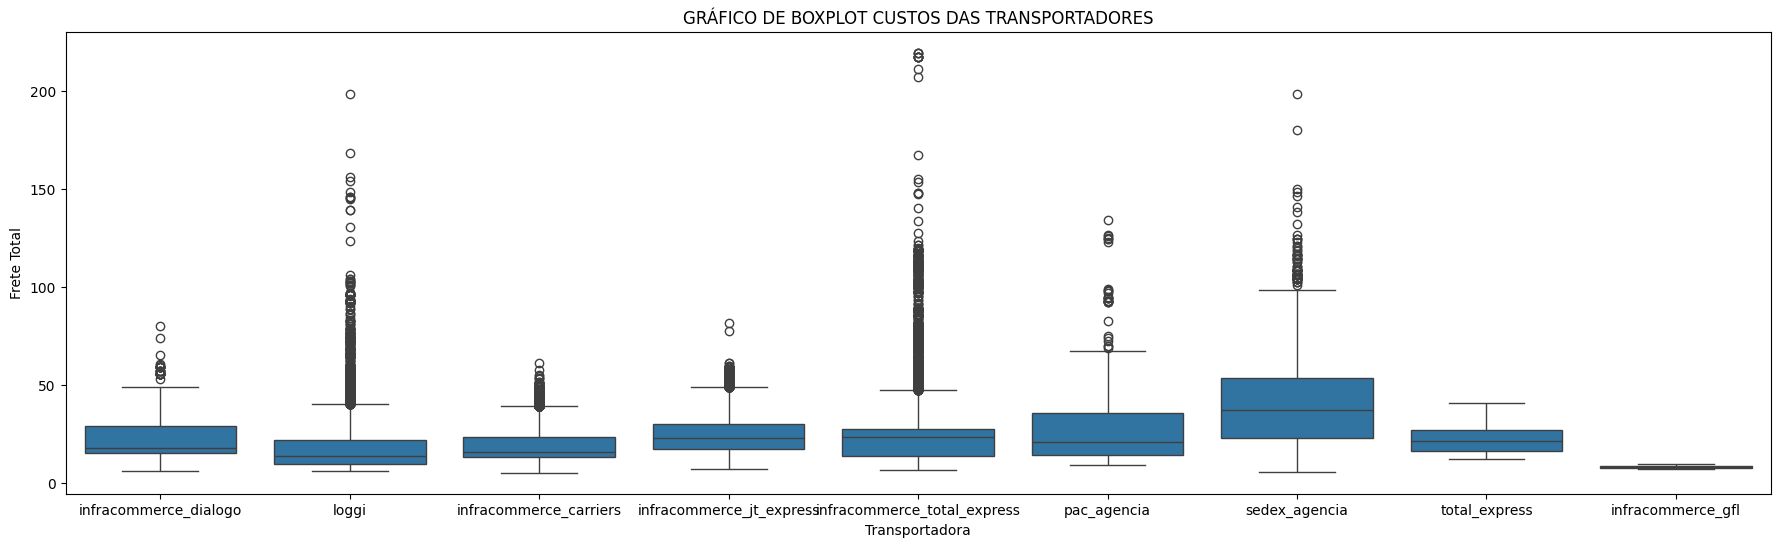

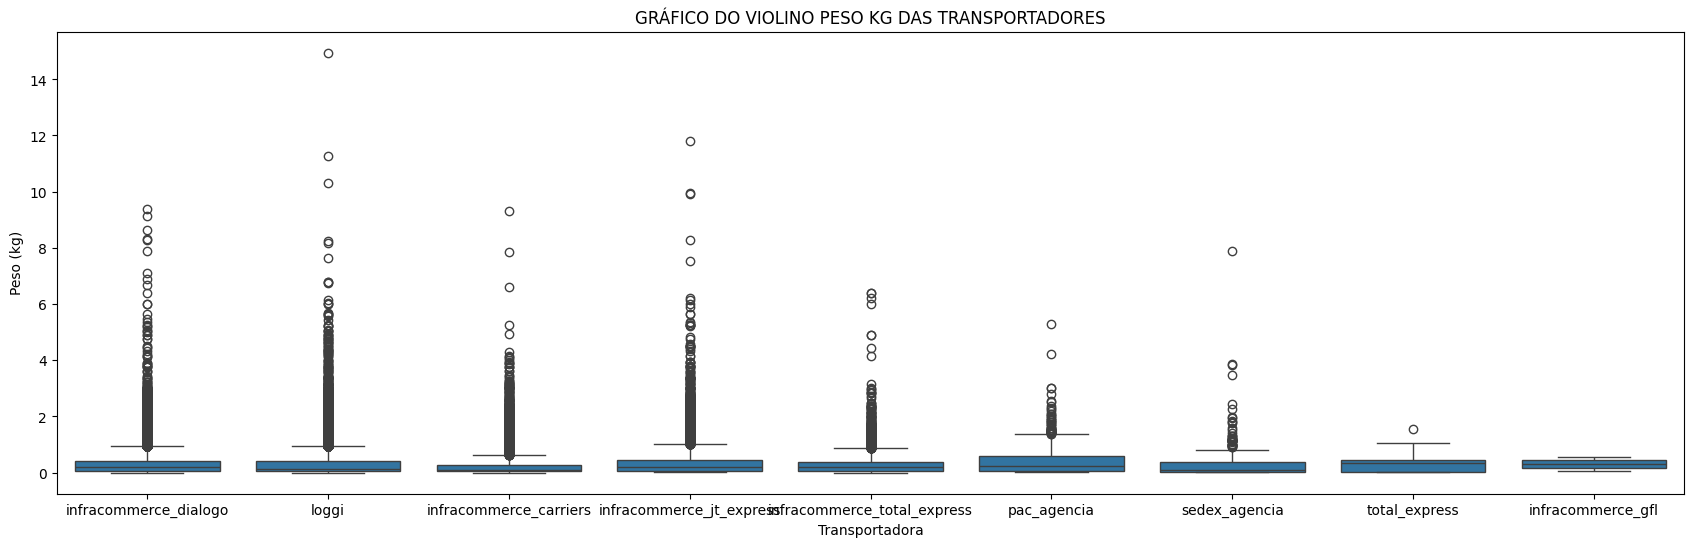

In [41]:
# Gráfico de boxplot do custo
plt.figure(figsize=(22,6))
plt.title('GRÁFICO DE BOXPLOT CUSTOS DAS TRANSPORTADORES')
sns.boxplot(data=base_dados, x='Transportadora', y='Frete Total')
plt.show()

# Peso x Transportadora
plt.figure(figsize=(21,6))
plt.title('GRÁFICO DO VIOLINO PESO KG DAS TRANSPORTADORES')
sns.boxplot(data=base_dados, x='Transportadora', y='Peso (kg)')
plt.show()

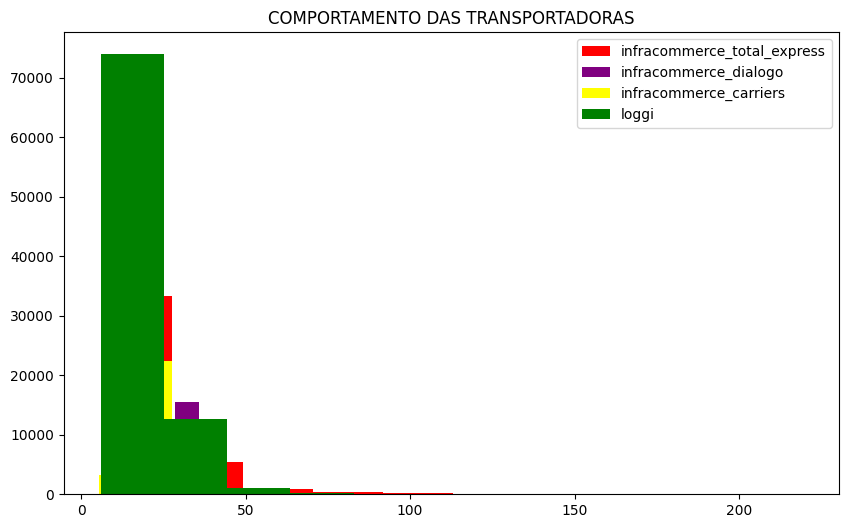

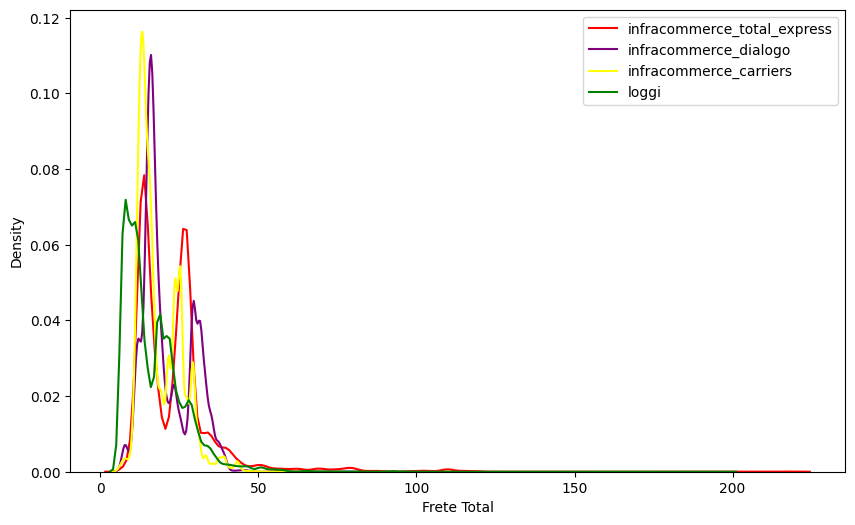

In [42]:
# HISTOHRAMA CUSTO EM CEARÁ

infracommerce_total_express = base_dados[base_dados['Transportadora']=='infracommerce_total_express']
infracommerce_dialogo = base_dados[base_dados['Transportadora']=='infracommerce_dialogo']
infracommerce_carriers = base_dados[base_dados['Transportadora']=='infracommerce_carriers']
loggi = base_dados[base_dados['Transportadora']=='loggi']



plt.figure(figsize=(10,6))
plt.title('COMPORTAMENTO DAS TRANSPORTADORAS')
plt.hist(infracommerce_total_express['Frete Total'],bins=10,color='red', label='infracommerce_total_express')
plt.hist(infracommerce_dialogo['Frete Total'],bins=10,color='purple', label='infracommerce_dialogo')
plt.hist(infracommerce_carriers['Frete Total'],bins=10,color='yellow', label='infracommerce_carriers')
plt.hist(loggi ['Frete Total'],bins=10,color='green', label='loggi')
plt.legend(loc='upper right')


# Gráfico de densidade
plt.figure(figsize=(10,6))
sns.kdeplot(data=infracommerce_total_express['Frete Total'] , color='red', label='infracommerce_total_express')
sns.kdeplot(data=infracommerce_dialogo['Frete Total'], color='purple', label='infracommerce_dialogo')
sns.kdeplot(data=infracommerce_carriers['Frete Total'], color='yellow', label='infracommerce_carriers')
sns.kdeplot(data=loggi['Frete Total'], color='green', label='loggi')
plt.legend(loc='upper right')
plt.show()

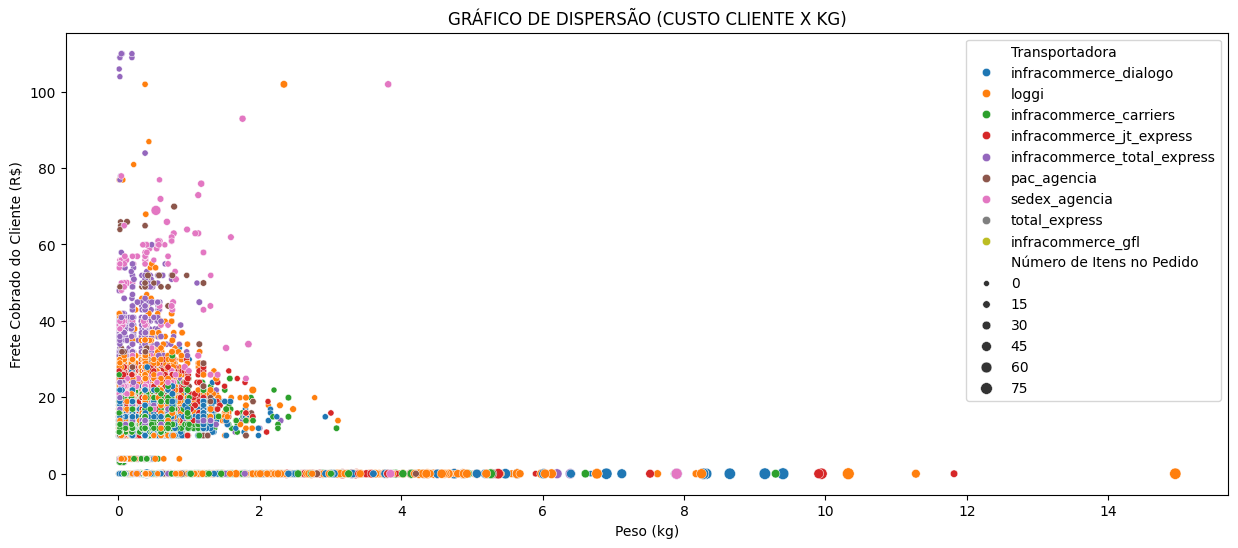

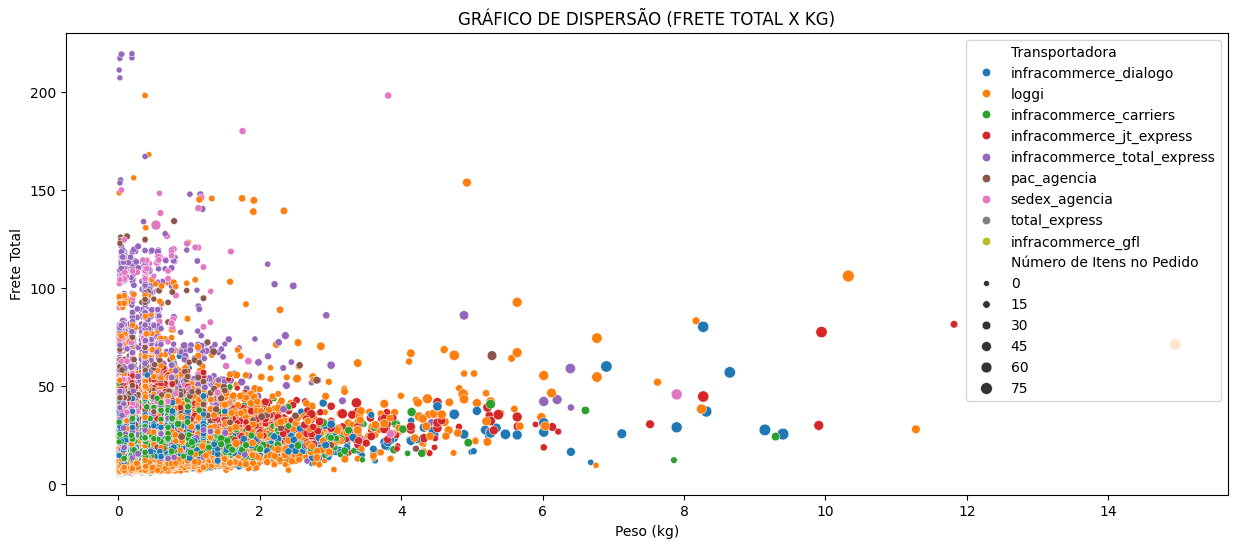

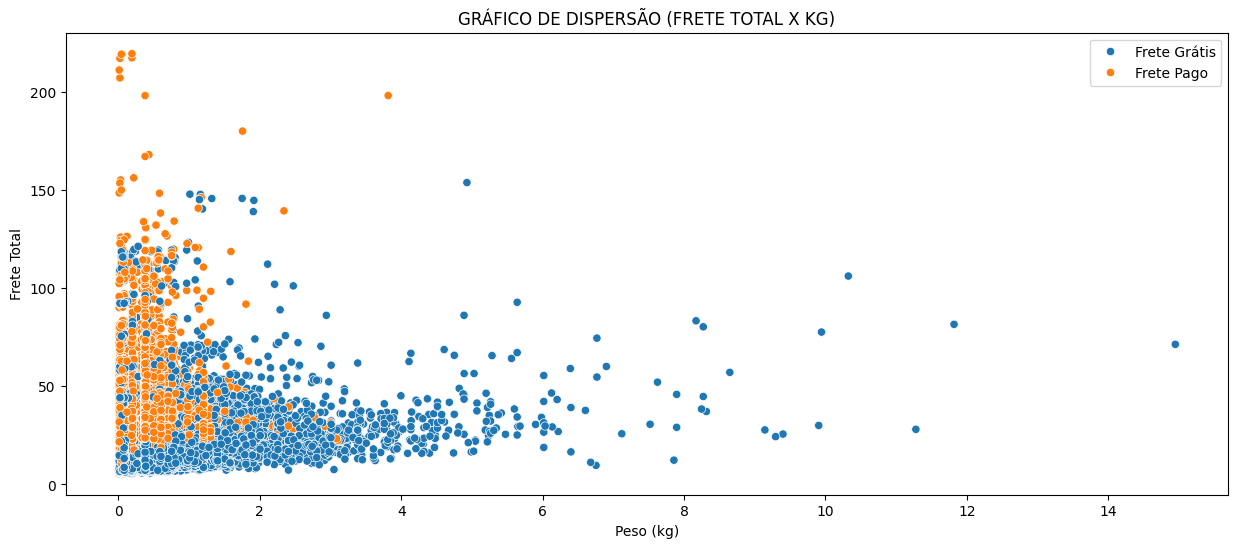

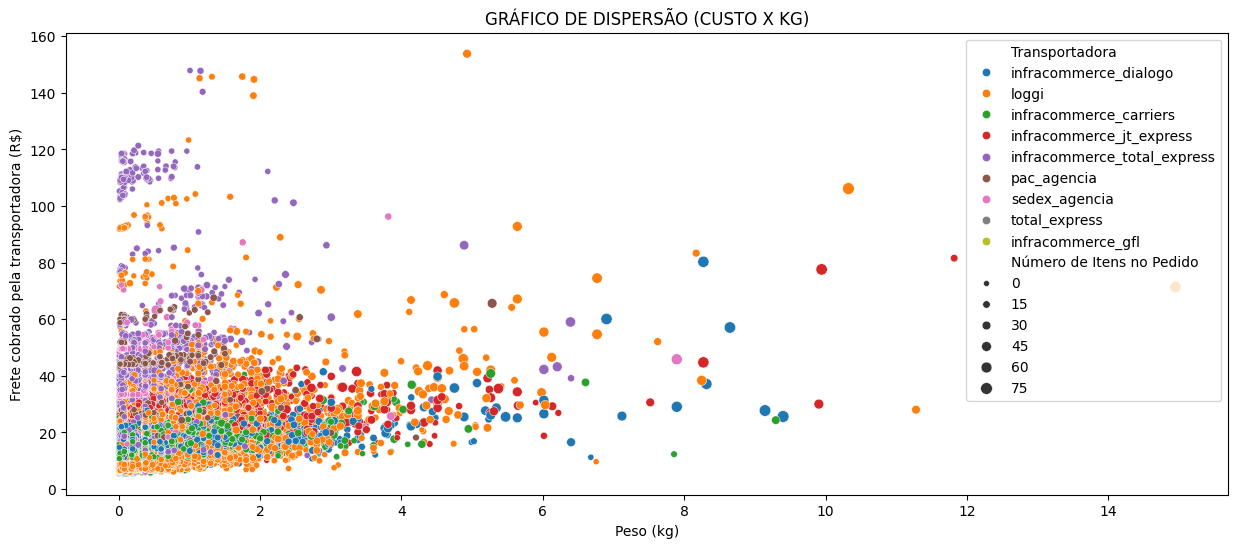

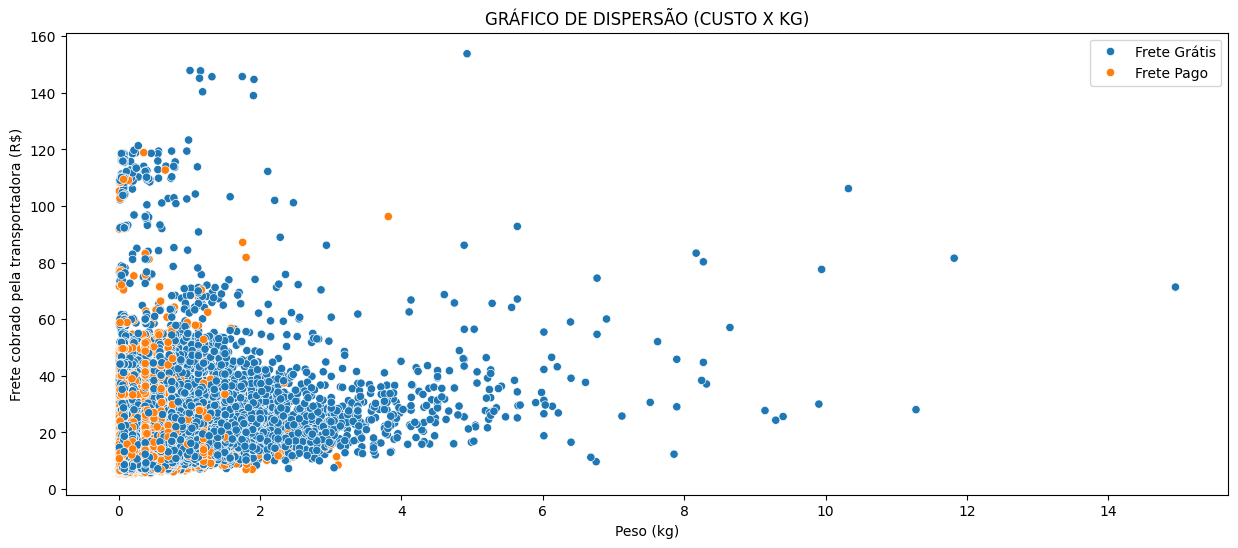

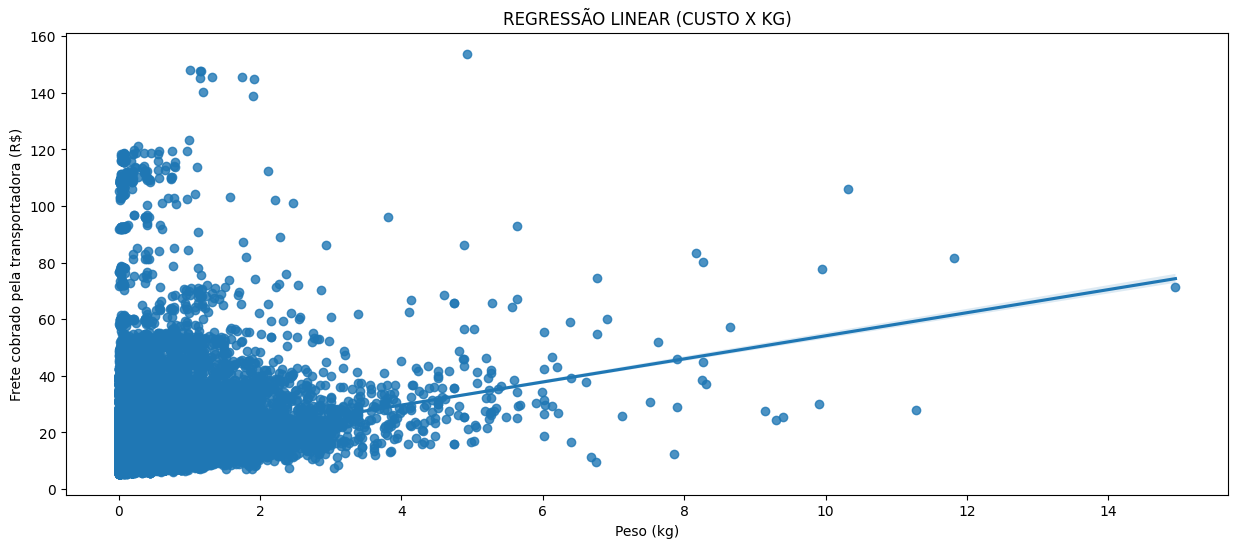

In [43]:
# Gráfico de dispenção

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO (CUSTO CLIENTE X KG)')
sns.scatterplot(data=base_dados, x ="Peso (kg)", y="Frete Cobrado do Cliente (R$)", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO (FRETE TOTAL X KG)')
sns.scatterplot(data=base_dados, x ="Peso (kg)", y="Frete Total", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO (FRETE TOTAL X KG)')
sns.scatterplot(data=base_dados, x ="Peso (kg)", y="Frete Total", hue='frete_status')
plt.legend(loc='upper right')
plt.show()


plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO (CUSTO X KG)')
sns.scatterplot(data=base_dados, x ="Peso (kg)", y="Frete cobrado pela transportadora (R$)", hue='Transportadora', size='Número de Itens no Pedido')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title(f'GRÁFICO DE DISPERSÃO (CUSTO X KG)')
sns.scatterplot(data=base_dados, x ="Peso (kg)", y="Frete cobrado pela transportadora (R$)", hue='frete_status')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,6))
plt.title('REGRESSÃO LINEAR (CUSTO X KG)')
sns.regplot(data=base_dados,x="Peso (kg)",y="Frete cobrado pela transportadora (R$)")
plt.show()

# TRANSPORTADORA A

In [44]:
# realizando a leitura dos dados

transportadora = pd.read_excel("/content/drive/MyDrive/Analista de dados/Transportadora A - Business Case.xlsx")
transportadora.head()

Região     CEPI     CEPF  PRAZO(DIAS ÚTEIS)    0,3    0,5   0,75      1  \
0  SP CAP  1000000  1001969                  1   5.22   5.85   6.50   7.14   
1  SP RED  1001970  1001988                  6  28.80  30.07  33.52  33.85   
2  SP RED  1001989  1001999                  6  28.80  30.07  33.52  33.85   
3  SP CAP  1002000  1009969                  1   5.22   5.85   6.50   7.14   
4  SP RED  1009970  1009998                  6  28.80  30.07  33.52  33.85   

    1,25    1,5  ...     11     12     13      14      15      20      25  \
0   8.13   8.89  ...  37.76  40.17  41.23   43.64   44.08   47.74   58.89   
1  39.67  41.61  ...  80.50  86.77  94.05  101.38  109.08  142.27  208.64   
2  39.67  41.61  ...  80.50  86.77  94.05  101.38  109.08  142.27  208.64   
3   8.13   8.89  ...  37.76  40.17  41.23   43.64   44.08   47.74   58.89   
4  39.67  41.61  ...  80.50  86.77  94.05  101.38  109.08  142.27  208.64   

       30  VALOR EXCEDENTE  SEGURO(%)  
0   63.65             1.90     0.6687  
1  249.20            16.22     0.6687  
2  249.20            16.22     0.6687  
3   63.65             1.90     0.6687  
4  249.20            16.22     0.6687  

[5 rows x 31 columns]

In [45]:
transportadora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29368 entries, 0 to 29367
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região             29368 non-null  object 
 1   CEPI               29368 non-null  int64  
 2   CEPF               29368 non-null  int64  
 3   PRAZO(DIAS ÚTEIS)  29368 non-null  int64  
 4   0,3                29368 non-null  float64
 5   0,5                29368 non-null  float64
 6   0,75               29368 non-null  float64
 7   1                  29368 non-null  float64
 8   1,25               29368 non-null  float64
 9   1,5                29368 non-null  float64
 10  2                  29368 non-null  float64
 11  2,5                29368 non-null  float64
 12  3                  29368 non-null  float64
 13  3,5                29368 non-null  float64
 14  4                  29368 non-null  float64
 15  5                  29368 non-null  float64
 16  6                  293

In [46]:
base_dados.head()


id  Valor de NF (R$)         Cidade        Estado       CEP  \
0  2787897            229.80       Curitiba        Paraná  80530280   
1  2787898            203.80      São Paulo     São Paulo   4671160   
2  2787899            112.80      São Paulo     São Paulo   4704050   
3  2787900            159.80  Três Corações  Minas Gerais  37410137   
4  2787901            115.81       Teresina         Piauí  64090095   

   Frete Cobrado do Cliente (R$)  Frete cobrado pela transportadora (R$)  \
0                            0.0                                    8.00   
1                           13.9                                    8.08   
2                           12.9                                    7.40   
3                            0.0                                    9.93   
4                           13.9                                   13.81   

           Transportadora Status do Pedido  Número de Itens no Pedido  \
0   infracommerce_dialogo        delivered                          8   
1                   loggi        delivered                          2   
2                   loggi        delivered                          2   
3  infracommerce_carriers        delivered                          4   
4  infracommerce_carriers        delivered                          2   

   Peso (kg)  Frete Total  frete_status  
0      0.130         8.00  Frete Grátis  
1      0.335        21.98    Frete Pago  
2      0.265        20.30    Frete Pago  
3      0.080         9.93  Frete Grátis  
4      0.190        27.71    Frete Pago

In [47]:
#validando os dados

# Escrevendo nova coluna para o sistema funcionar
Nova_coluna = ['Região', 'CEPI', 'CEPF', 'PRAZO(DIAS ÚTEIS)', '0.3', '0.5', '0.75',
       '1.0', '1.25', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '20.0', '25.0', '30.0',
       'VALOR EXCEDENTE', 'SEGURO(%)']

# Substituindo colunas
transportadora.columns = Nova_coluna


# Filtrando CEP específicifico
i = transportadora[(transportadora['CEPI'] <= 4671160) & (transportadora['CEPF'] >= 4671160)]


peso = 5.85
nota = 203.80
seguro = 0.6687
valor_total = (nota * seguro) + peso
print(valor_total)
i

# Informações validada com sucesso !

142.13106


Região     CEPI     CEPF  PRAZO(DIAS ÚTEIS)   0.3   0.5  0.75   1.0  \
556  SP CAP  4662000  4707969                  1  5.22  5.85   6.5  7.14   

     1.25   1.5  ...   11.0   12.0   13.0   14.0   15.0   20.0   25.0   30.0  \
556  8.13  8.89  ...  37.76  40.17  41.23  43.64  44.08  47.74  58.89  63.65   

     VALOR EXCEDENTE  SEGURO(%)  
556              1.9     0.6687  

[1 rows x 31 columns]

In [48]:
# Tratamento inicial do sistema

# Retirando o valor vaizos do peso
base_dados.dropna(inplace=True)

# Escrevendo nova coluna para o sistema funcionar
Nova_coluna = ['Região', 'CEPI', 'CEPF', 'PRAZO(DIAS ÚTEIS)', '0.3', '0.5', '0.75',
       '1.0', '1.25', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '20.0', '25.0', '30.0',
       'VALOR EXCEDENTE', 'SEGURO(%)']

# Substituindo colunas
transportadora.columns = Nova_coluna

# Transformando letra para numero
lista_peso_float = transportadora.columns[4:29].astype(float)

# CEP ATUAL
cep_transportaora_A = []

# Lista dias uteis
dias_uteis_lista = []

# Seguro
seguro = []

# Valor adicional do frete
valor_adicional = []

# valor da Nota fiscal
nota_fiscal = []

# ID
id = []


# realizando o sistema de precificação
for index, row in base_dados.iterrows():

  # Filtrando CEP específicifico
  i = transportadora[(transportadora['CEPI'] <= row['CEP']) & (transportadora['CEPF'] >= row['CEP'])]

  if i.empty:

    # VALOR PERCENTUAL DO SEGURO
    seguro.append("desconsiderar")

    #VALOR ADICIONAL DEPEDENDO DO FRETE
    valor_adicional.append("desconsiderar")

    # DIAS UTEIS QUE A TRANSPORTADORA FALOU
    dias_uteis_lista.append("desconsiderar")

    # CEP ESCOLHIDO
    cep_transportaora_A.append(row['CEP'])

    # VALOR DA NOTA FISCAL
    nota_fiscal.append(row['Valor de NF (R$)'])

    # Valor do ID
    id.append(row['id'])

  else:


    # Função que pega a coluna ideal para peso
    def numero_maior(num):
      return num > row['Peso (kg)']

    # Transformanda numero para letra
    lista_filtro = list(filter(numero_maior, lista_peso_float))
    filtro = str(lista_filtro[0])
    coluna_selecionada_transportadora = ['PRAZO(DIAS ÚTEIS)',filtro,'SEGURO(%)']
    i = i[coluna_selecionada_transportadora]

    # DIAS UTEIS QUE A TRANSPORTADORA FALOU
    dias_uteis_lista.append(i['PRAZO(DIAS ÚTEIS)'].tolist()[0])

    #VALOR ADICIONAL DEPEDENDO DO FRETE
    valor_adicional.append(i[filtro].tolist()[0])

    # VALOR PERCENTUAL DO SEGURO
    seguro.append(i['SEGURO(%)'].tolist()[0])

    # CEP ESCOLHIDO
    cep_transportaora_A.append(row['CEP'])

    # VALOR DA NOTA FISCAL
    nota_fiscal.append(row['Valor de NF (R$)'])

    # Valor do ID
    id.append(row['id'])




In [49]:
# Criando uma nova base de dados das listas obtiddas
transportadora_base = pd.DataFrame({
    'id': id,
    'dias_uteis_lista': dias_uteis_lista,
    'CEP': cep_transportaora_A,
    'seguro': seguro,
    'valor_adicional': valor_adicional,
    'Valor de NF (R$)': nota_fiscal
                                  })

# garantido que não tenha as descosiderações
transportadora_base = transportadora_base[transportadora_base['seguro'] != 'desconsiderar']
transportadora_base = transportadora_base[transportadora_base['dias_uteis_lista'] != 'desconsiderar']
transportadora_base = transportadora_base[transportadora_base['valor_adicional'] != 'desconsiderar']

# colocando para int e float
transportadora_base['dias_uteis_lista'] = transportadora_base['dias_uteis_lista'].astype(int)
transportadora_base['seguro'] = transportadora_base['seguro'].astype(float)
transportadora_base['valor_adicional'] = transportadora_base['valor_adicional'].astype(float)
transportadora_base['Valor de NF (R$)'] = transportadora_base['Valor de NF (R$)'].astype(float)


#Realizando calculo do frete
transportadora_base["Frete_transportadora_A"] = (transportadora_base["Valor de NF (R$)"] * (transportadora_base["seguro"]/100)) + transportadora_base["valor_adicional"]

transportadora_base.head()

id  dias_uteis_lista       CEP  seguro  valor_adicional  \
0  2787897                 2  80530280  0.6687             7.02   
1  2787898                 1   4671160  0.6687             5.85   
2  2787899                 1   4704050  0.6687             5.22   
3  2787900                 2  37410137  0.6687             8.41   
4  2787901                 8  64090095  0.6687            13.16   

   Valor de NF (R$)  Frete_transportadora_A  
0            229.80                8.556673  
1            203.80                7.212811  
2            112.80                5.974294  
3            159.80                9.478583  
4            115.81               13.934421

In [50]:
#Vendo a descrição
transportadora_base.describe()

id  dias_uteis_lista           CEP         seguro  \
count  3.480060e+05     348006.000000  3.480060e+05  348006.000000   
mean   3.031323e+06          3.263202  3.706579e+07       0.737071   
std    1.379677e+05          2.788340  3.035797e+07       0.254672   
min    2.787897e+06          1.000000  1.001000e+06       0.668700   
25%    2.910316e+06          1.000000  9.820135e+06       0.668700   
50%    3.034283e+06          2.000000  2.596102e+07       0.668700   
75%    3.150591e+06          4.000000  6.507002e+07       0.668700   
max    3.269036e+06         41.000000  9.999000e+07       2.006100   

       valor_adicional  Valor de NF (R$)  Frete_transportadora_A  
count    348006.000000     348006.000000           348006.000000  
mean         10.940659        182.702679               12.286657  
std           8.605457        120.163370                8.841159  
min           5.220000          0.000000                5.220000  
25%           6.570000        112.610000                7.954843  
50%           9.120000        159.800000               10.190742  
75%          11.520000        206.800000               13.029498  
max         183.140000       4894.370000              189.956059

In [51]:
# realizando merge pelo id
comparação = pd.merge(base_dados, transportadora_base, on=['id'])
comparação

id  Valor de NF (R$)_x                  Cidade        Estado  \
0       2787897              229.80                Curitiba        Paraná   
1       2787898              203.80               São Paulo     São Paulo   
2       2787899              112.80               São Paulo     São Paulo   
3       2787900              159.80           Três Corações  Minas Gerais   
4       2787901              115.81                Teresina         Piauí   
...         ...                 ...                     ...           ...   
348001  3269028              159.80          Lagoa da Prata  Minas Gerais   
348002  3269031              100.80     Santana de Parnaíba     São Paulo   
348003  3269032              163.10               São Paulo     São Paulo   
348004  3269033              194.80  Conceição do Rio Verde  Minas Gerais   
348005  3269036              159.80                Ourinhos     São Paulo   

           CEP_x  Frete Cobrado do Cliente (R$)  \
0       80530280                            0.0   
1        4671160                           13.9   
2        4704050                           12.9   
3       37410137                            0.0   
4       64090095                           13.9   
...          ...                            ...   
348001  35592260                            0.0   
348002   6543355                           10.9   
348003   8230740                            0.0   
348004  37430000                           14.9   
348005  19901650                            0.0   

        Frete cobrado pela transportadora (R$)               Transportadora  \
0                                         8.00        infracommerce_dialogo   
1                                         8.08                        loggi   
2                                         7.40                        loggi   
3                                         9.93       infracommerce_carriers   
4                                        13.81       infracommerce_carriers   
...                                        ...                          ...   
348001                                   18.65  infracommerce_total_express   
348002                                   10.75       infracommerce_carriers   
348003                                    9.25                        loggi   
348004                                   14.16        infracommerce_dialogo   
348005                                   13.21       infracommerce_carriers   

       Status do Pedido  Número de Itens no Pedido  Peso (kg)  Frete Total  \
0             delivered                          8      0.130         8.00   
1             delivered                          2      0.335        21.98   
2             delivered                          2      0.265        20.30   
3             delivered                          4      0.080         9.93   
4             delivered                          2      0.190        27.71   
...                 ...                        ...        ...          ...   
348001        delivered                          4      0.080        18.65   
348002        delivered                          1      0.010        21.65   
348003        delivered                          4      0.386         9.25   
348004        delivered                          3      0.198        29.06   
348005        delivered                          4      0.080        13.21   

        frete_status  dias_uteis_lista     CEP_y   seguro  valor_adicional  \
0       Frete Grátis                 2  80530280  0.66870             7.02   
1         Frete Pago                 1   4671160  0.66870             5.85   
2         Frete Pago                 1   4704050  0.66870             5.22   
3       Frete Grátis                 2  37410137  0.66870             8.41   
4         Frete Pago                 8  64090095  0.66870            13.16   
...              ...               ...       ...      ...              ...   
348001  Frete Grátis                 5  355

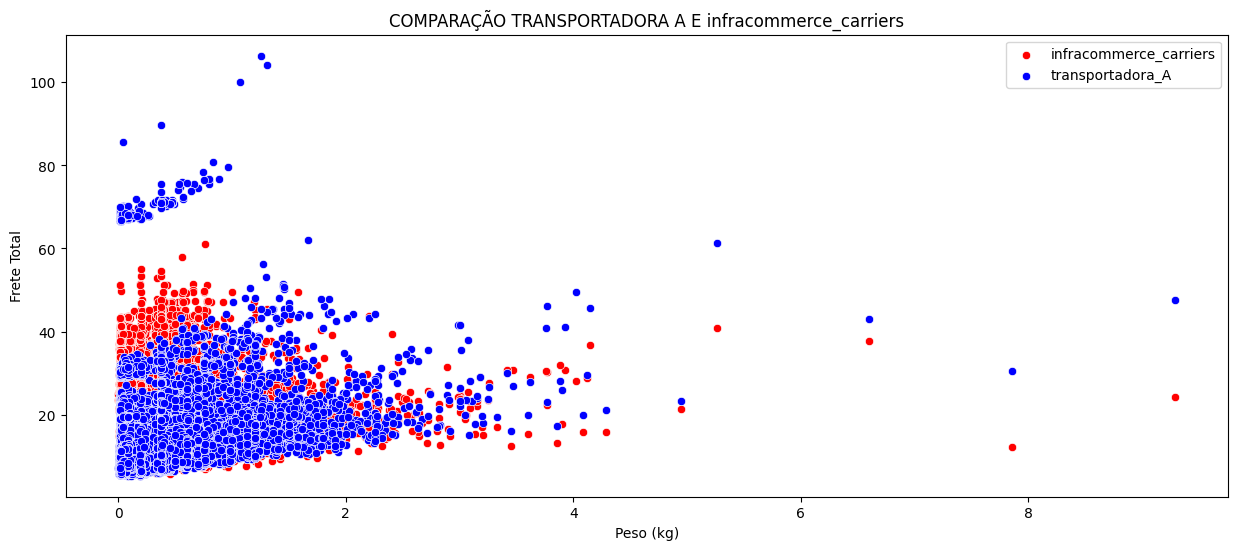

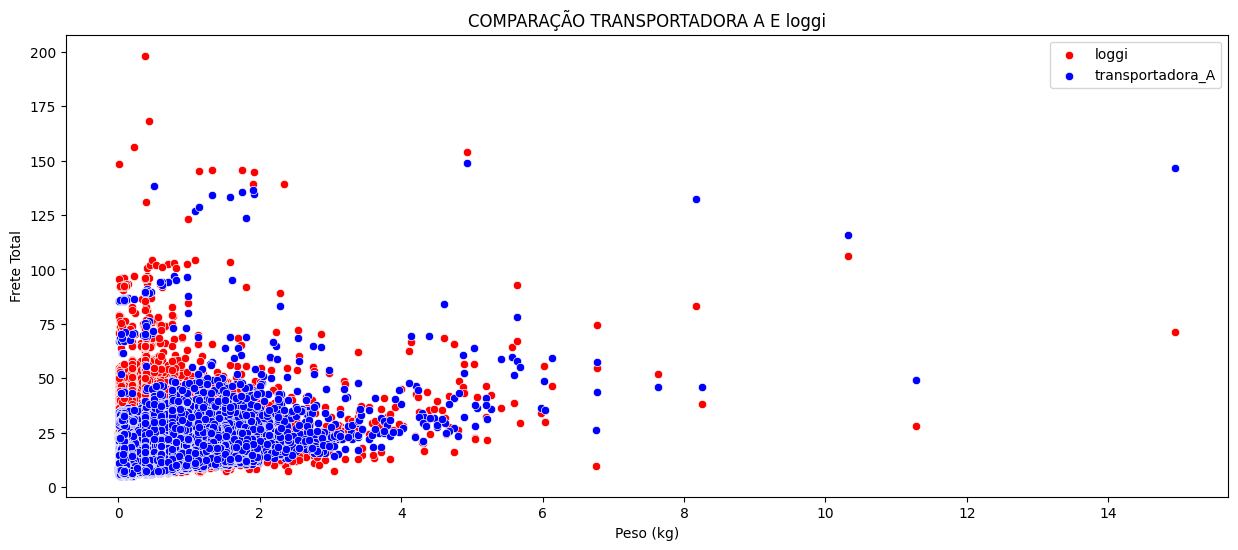

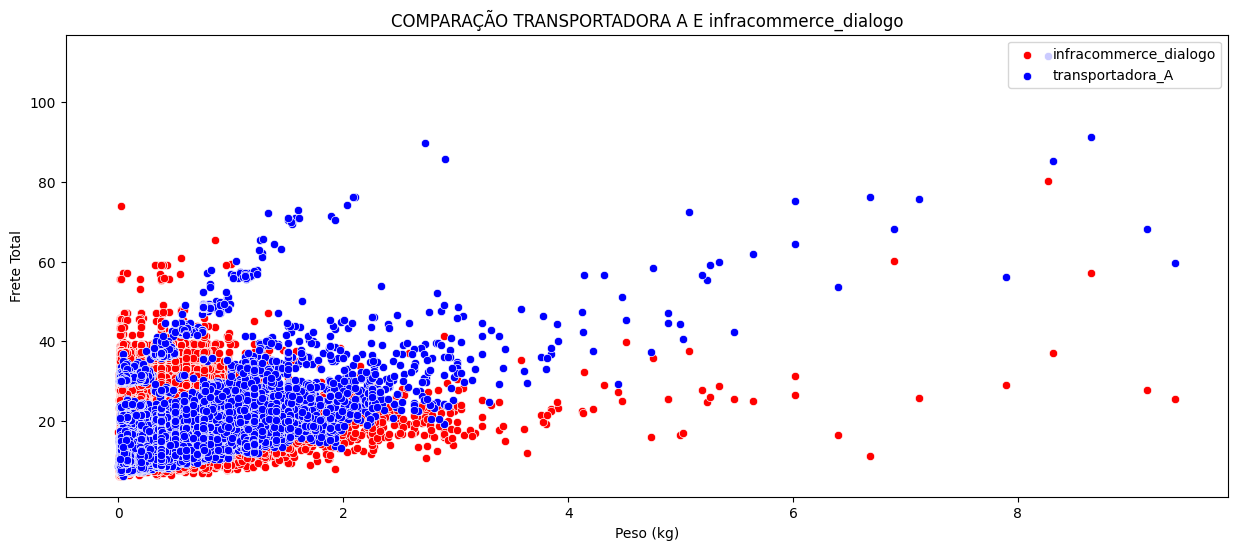

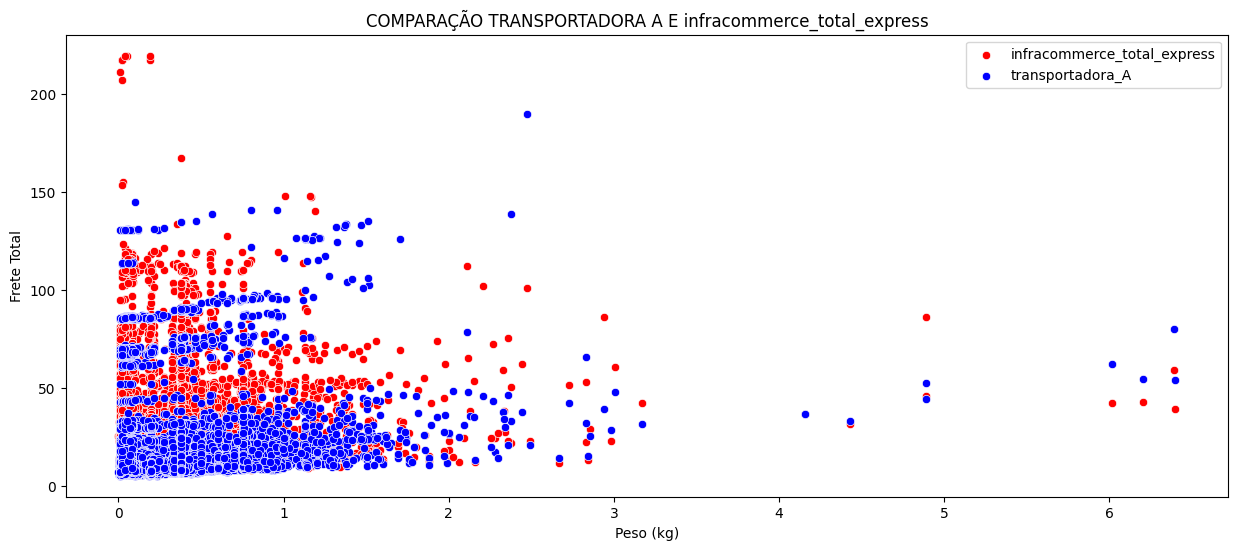

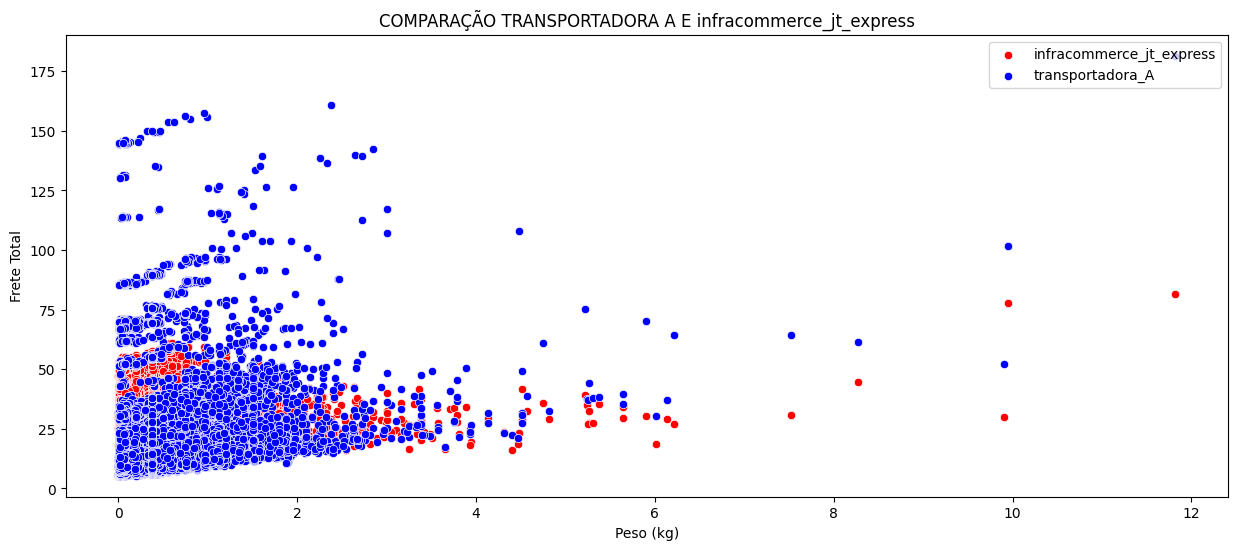

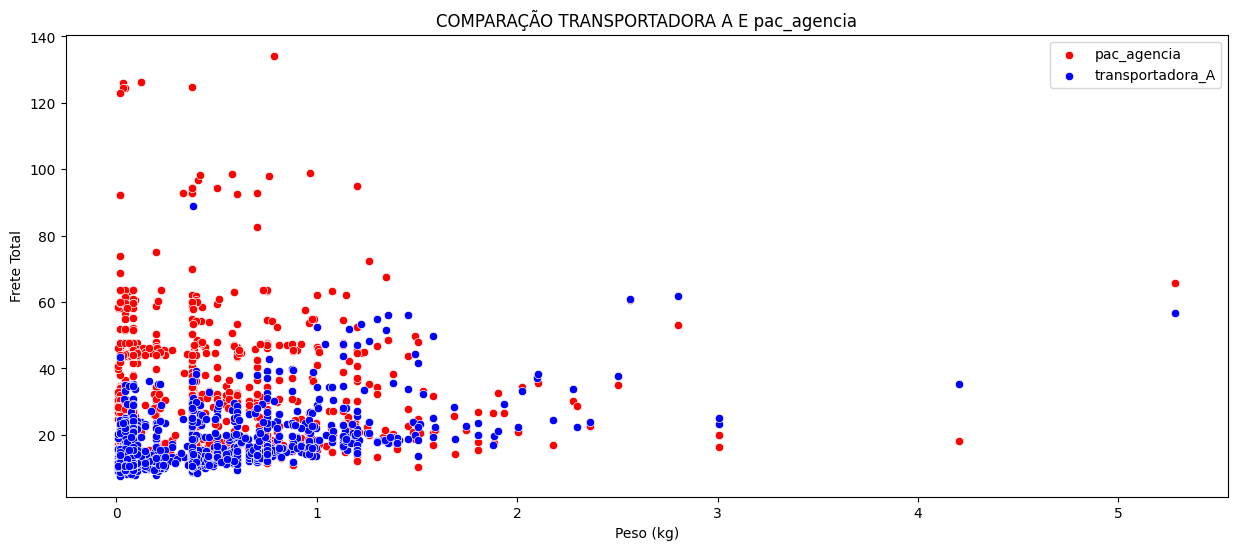

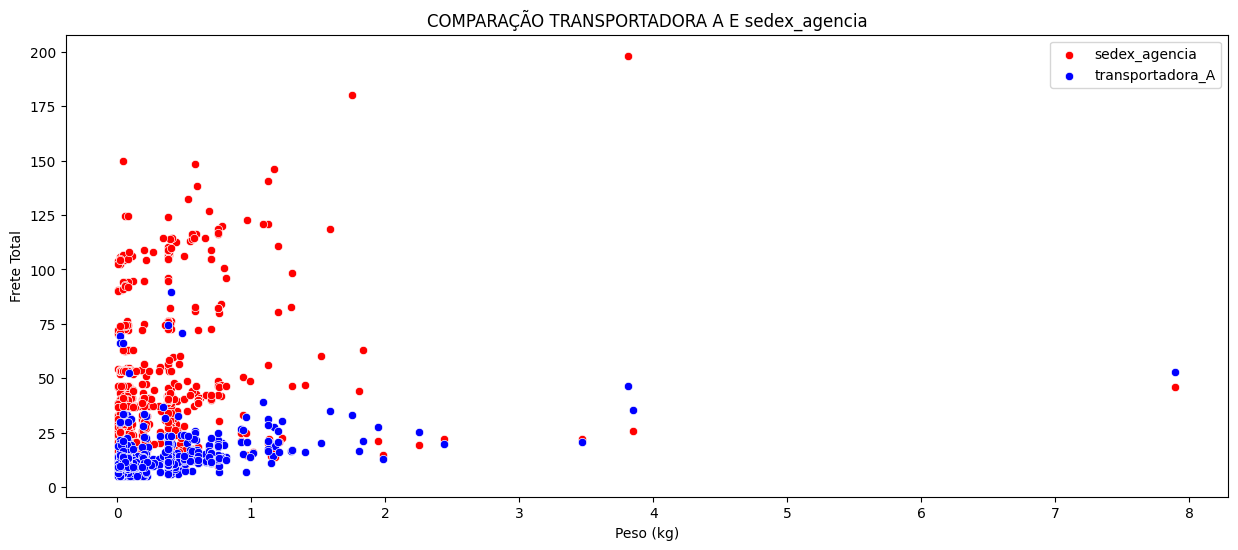

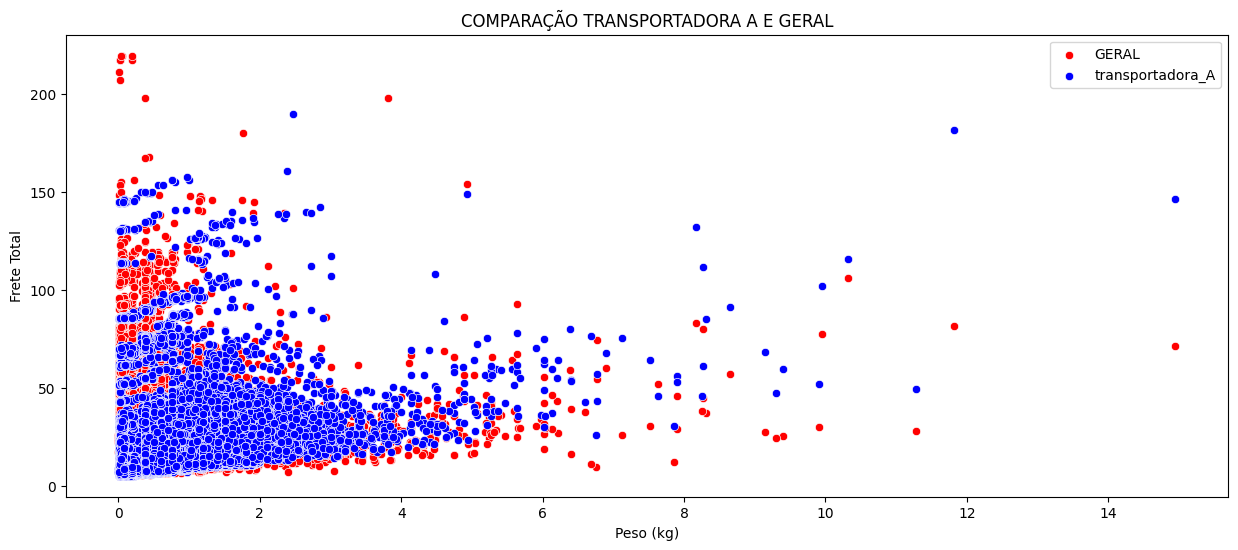

In [52]:
# Pegando as colunas que apenas queremos para realizar a comparação
comparação = comparação[['Valor de NF (R$)_x','Estado','Transportadora', 'Peso (kg)', 'Frete Total', 'Frete_transportadora_A']]

# comparando com a infracommerce_carriers
infracommerce_carriers = comparação[comparação['Transportadora'] == 'infracommerce_carriers']
plt.figure(figsize=(15,6))
plt.title(f'COMPARAÇÃO TRANSPORTADORA A E infracommerce_carriers')
sns.scatterplot(data=infracommerce_carriers, x ="Peso (kg)", y="Frete Total", color='red',label = 'infracommerce_carriers')
sns.scatterplot(data=infracommerce_carriers, x ="Peso (kg)", y="Frete_transportadora_A", color='blue', label='transportadora_A')
plt.legend(loc='upper right')
plt.show()

# comparando com a loggi
loggi = comparação[comparação['Transportadora'] == 'loggi']
plt.figure(figsize=(15,6))
plt.title(f'COMPARAÇÃO TRANSPORTADORA A E loggi')
sns.scatterplot(data=loggi, x ="Peso (kg)", y="Frete Total", color='red',label = 'loggi')
sns.scatterplot(data=loggi, x ="Peso (kg)", y="Frete_transportadora_A", color='blue', label='transportadora_A')
plt.legend(loc='upper right')
plt.show()

# comparando com a infracommerce_dialogo
infracommerce_dialogo = comparação[comparação['Transportadora'] == 'infracommerce_dialogo']
plt.figure(figsize=(15,6))
plt.title(f'COMPARAÇÃO TRANSPORTADORA A E infracommerce_dialogo')
sns.scatterplot(data=infracommerce_dialogo, x ="Peso (kg)", y="Frete Total", color='red',label = 'infracommerce_dialogo')
sns.scatterplot(data=infracommerce_dialogo, x ="Peso (kg)", y="Frete_transportadora_A", color='blue', label='transportadora_A')
plt.legend(loc='upper right')
plt.show()


# comparando com a infracommerce_total_express
infracommerce_total_express = comparação[comparação['Transportadora'] == 'infracommerce_total_express']
plt.figure(figsize=(15,6))
plt.title(f'COMPARAÇÃO TRANSPORTADORA A E infracommerce_total_express')
sns.scatterplot(data=infracommerce_total_express, x ="Peso (kg)", y="Frete Total", color='red',label = 'infracommerce_total_express')
sns.scatterplot(data=infracommerce_total_express, x ="Peso (kg)", y="Frete_transportadora_A", color='blue', label='transportadora_A')
plt.legend(loc='upper right')
plt.show()

# comparando com a infracommerce_jt_express
infracommerce_jt_express = comparação[comparação['Transportadora'] == 'infracommerce_jt_express']
plt.figure(figsize=(15,6))
plt.title(f'COMPARAÇÃO TRANSPORTADORA A E infracommerce_jt_express')
sns.scatterplot(data=infracommerce_jt_express, x ="Peso (kg)", y="Frete Total", color='red',label = 'infracommerce_jt_express')
sns.scatterplot(data=infracommerce_jt_express, x ="Peso (kg)", y="Frete_transportadora_A", color='blue', label='transportadora_A')
plt.legend(loc='upper right')
plt.show()

# comparando com a pac_agencia
pac_agencia = comparação[comparação['Transportadora'] == 'pac_agencia']
plt.figure(figsize=(15,6))
plt.title(f'COMPARAÇÃO TRANSPORTADORA A E pac_agencia')
sns.scatterplot(data=pac_agencia, x ="Peso (kg)", y="Frete Total", color='red',label = 'pac_agencia')
sns.scatterplot(data=pac_agencia, x ="Peso (kg)", y="Frete_transportadora_A", color='blue', label='transportadora_A')
plt.legend(loc='upper right')
plt.show()

# comparando com a sedex_agencia
sedex_agencia = comparação[comparação['Transportadora'] == 'sedex_agencia']
plt.figure(figsize=(15,6))
plt.title(f'COMPARAÇÃO TRANSPORTADORA A E sedex_agencia')
sns.scatterplot(data=sedex_agencia, x ="Peso (kg)", y="Frete Total", color='red',label = 'sedex_agencia')
sns.scatterplot(data=sedex_agencia, x ="Peso (kg)", y="Frete_transportadora_A", color='blue', label='transportadora_A')
plt.legend(loc='upper right')
plt.show()

# COMPARAÇÃO GERAL

plt.figure(figsize=(15,6))
plt.title(f'COMPARAÇÃO TRANSPORTADORA A E GERAL')
sns.scatterplot(data=comparação, x ="Peso (kg)", y="Frete Total", color='red',label = 'GERAL')
sns.scatterplot(data=comparação, x ="Peso (kg)", y="Frete_transportadora_A", color='blue', label='transportadora_A')
plt.legend(loc='upper right')
plt.show()

#RESULTADO DA ANÁLISE
#REDUZIR CUSTO
 - O grande problema que estamos enfrentando é a quantidade de frete que a Gocase paga para oferecer frete grátis ou mais barato aos clientes.

 - Primeira sugestão: para precificar o frete que a Gocase paga, deve-se basear no início do gráfico da regressão linear. Quando o peso (eixo x) for 0 < x <= 3, e o valor do frete pago pela Gocase estiver acima da linha da regressão linear (acima do eixo y), o cliente deve pagar uma parte maior do frete até que o custo fique próximo da linha da regressão linear.

 - Ao observar o gráfico de boxplot das transportadoras em cada estado, encontramos outliers significativos. No entanto, grande parte deles são valores diretamente proporcionais ao peso e ao custo da transportadora. Todavia, isso não acontece com a transportadora Infracommerce Total Express, que, mesmo com produtos de peso < 2kg, apresenta valores bastante elevados.

 - Segunda sugestão: recomendamos retirar ou fazer com que o cliente pague grande do frete da transportadora Infracommerce Total Express, pois o custo do frete não é padronizado e é muito elevado em comparação com outras transportadoras que possuem custos de frete bem menores. Os gráficos estatísticos (dispersão, boxplot, densidade, histograma e violino) mostram que seus outliers são mais elevados.

#AUMENTAR CUSTO
 - Na Regressão Linear, percebemos também que devemos aumentar nossos custos de frete mais próximos da linha reta quando o cliente compra produtos com peso bastante elevado.

 - Por exemplo: No Rio de Janeiro, um cliente pagou uma parte do frete para um produto com peso de 3kg. O gráfico mostra que ele é o único que pagou o frete. Portanto, é justo que o cliente obtenha frete grátis ou com valor bastante reduzido para que esse ponto fique próximo da regressão. Assim, aumentaríamos a satisfação do cliente.

#REDUZIR CUSTO X AUMENTAR CUSTO
 - Se seguirmos essas sugestões, reduziremos drasticamente nosso custo e aumentaremos a satisfação do cliente em relação ao frete, pois ele pagará menos. Os clientes escolherão transportadoras com preços acessíveis em vez de outras com preços mais elevados, resultando em menor custo de frete para ambos os lados.

# TOP 4 TRANSPORTADORAS QUE MAIS DÃO PREJUÍZO
 1. Infracommerce Total Express
 2. Sedex Agência
 3. PAC Agência
 4. Loggi (para alguns estados)

#TOP 4 TRANSPORTADORAS QUE POSSUEM CUSTO BAIXO
 1. Infracommerce Carriers
 2. Infracommerce Diálogo
 3. Infracommerce JT Express
 4. Transportadora A

#SOBRE AS TRANSPORTADORAS

 - Loggi: É uma das mais baratas em alguns estados como São Paulo e Rio de Janeiro, mas não possui uma padronização de preço em outros estados, sendo bastante elevada. É necessário negociar com ela para baixar seus preços de frete para competir com a Infracommerce Carriers, Infracommerce Diálogo ou Transportadora A.

 - Infracommerce Diálogo: É uma das transportadoras mais competitivas, com preços de frete bastante baixos em relação a outras.

 - Infracommerce JT Express: Como mostrado no gráfico de dispersão, seu frete é perfeitamente linear e com custo baixo, competindo com a Infracommerce Diálogo, Infracommerce Carriers e Transportadora A.

 - Infracommerce Carriers: É uma das transportadoras mais competitivas, com preços de frete bastante baixos em relação a outras.

 - Transportadora A: Essa transportadora é sensacional! Das quatro transportadoras com preços elevados de frete, ela consegue ter um preço bastante reduzido, competindo diretamente com a Infracommerce Carriers e Infracommerce Diálogo, mas perdendo para a Infracommerce JT Express.

 - Infracommerce Total Express, Sedex Agência e PAC Agência são transportadoras que não vale a pena manter, pois temos quatro transportadoras com custos bastante reduzidos.

# TRANSPORTADORA A

 - Na última linha do código foi realizado um sistema que precifica o frete se baseando no CEP e peso da mercadoria. Nesse sistema tinhamos 65 CEP que a transportadora A não entregava, porque o não estava dentro do intervalo de entrega.

 - Inicialmente foi comparado com as 3 transportadoras que possuem frete mais baratos. A transportadora A conseguiu competir de igual para igual com Infracommerce Carriers, Infracommerce Diálogo, mas perdendo para Infracommerce JT Express como mostra o gráfico de dispersão.

 - Por fim comparamos com as 4 transportadoras que o custo é maior. A trasportadora A conseguiu disparadamente ter um custo muito menor em comparação com a Loggi, PAC Agência, Sedex Agência, Infracommerce Total Express.

 # SUGESTÃO FINAL

  - A transportadora A vale muito apena incluir ela, se for possivel, retirar a Infracommerce Total Express ou fazer com que o vliente pague maior parte do frete.
  
  - A transportadora Loggi tem um grande potencial em ter custo baixo, mas seu preço não é padronizado, fazendo com que possue custo bastante elevado. Eu negociaria com ela para reduzir os seus preços mostrando essa análise.

  
